# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Задачи исследования


Осмотр данных

-посмотрим датасет

-сделаем предварительные выводы

-поищем аномалии




## 2. Обработка данных


-найти и обработать пропуски

-заменить некорректные типы данных

-удалить дубликаты

-цена одного квадратного метра

-день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

-месяц публикации объявления

-год публикации объявления

-тип этажа квартиры (значения — «‎первый», «последний», «другой»)

-расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)


## 3. Ответы на вопросы

1 Изучите следующие параметры объектов:
     
   общая площадь
   
   жилая площадь
   
   площадь кухни
   
   цена объекта
   
   количество комнат
   
   высота потолков
   
   этаж квартиры
   
   тип этажа квартиры («первый», «последний», «другой»)
   
   общее количество этажей в доме
   
   расстояние до центра города в метрах
   
   расстояние до ближайшего аэропорта
   
   расстояние до ближайшего парка
   
   день и месяц публикации объявления.
   
   Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке
        
2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
     Постройте гистограмму.
     Посчитайте среднее и медиану.

3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?
     Изучите, зависит ли цена от:
        общей площади;
        жилой площади;
        площади кухни;
        количества комнат;
        этажа, на котором расположена квартира (первый, последний, другой);
        даты размещения (день недели, месяц, год).
        Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
        
4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
    Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

#  Напишите общий вывод

Опишите полученные результаты и зафиксируйте основной вывод проведённого исследования.

In [95]:
#Запускаем библиотеку пандас для работы с таблицами.
import pandas as pd
#Запускает бибилиотеку matplotlib для работы с plot 
import matplotlib.pyplot as plt
#Запускаем библиотеку numpy для работы с массивами
import numpy as np
#Импортируем метод для таблиц
import seaborn as np

In [96]:
# Прочитали фаил таблицы csv,сделали разделение столбцов методом sep и присвоили переменной data 

try:
    data = pd.read_csv('C:/Users/hulyg/real_estate_data.csv', sep='\t')
    
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [97]:
# Просмотрели информацию о таблице количество: строчек, столбцов и пропусков в столбцах и их типы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [98]:
#Открыли таблицу для дальнейшей работы
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [99]:
#Смотрим какие значения у нас есть в датасете нашем , средние, минимальные максимальные.
#Выявили столбец rooms, который имеет 0 комнат(обработаем позже)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [100]:
#Вывели сумму пропуском в каждом столбце и отсортировали,
#чтобы удобно обрабатывать от меньшего к большему 
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [101]:
#Проверили данные на явные дубликаты. не выявлено. 
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

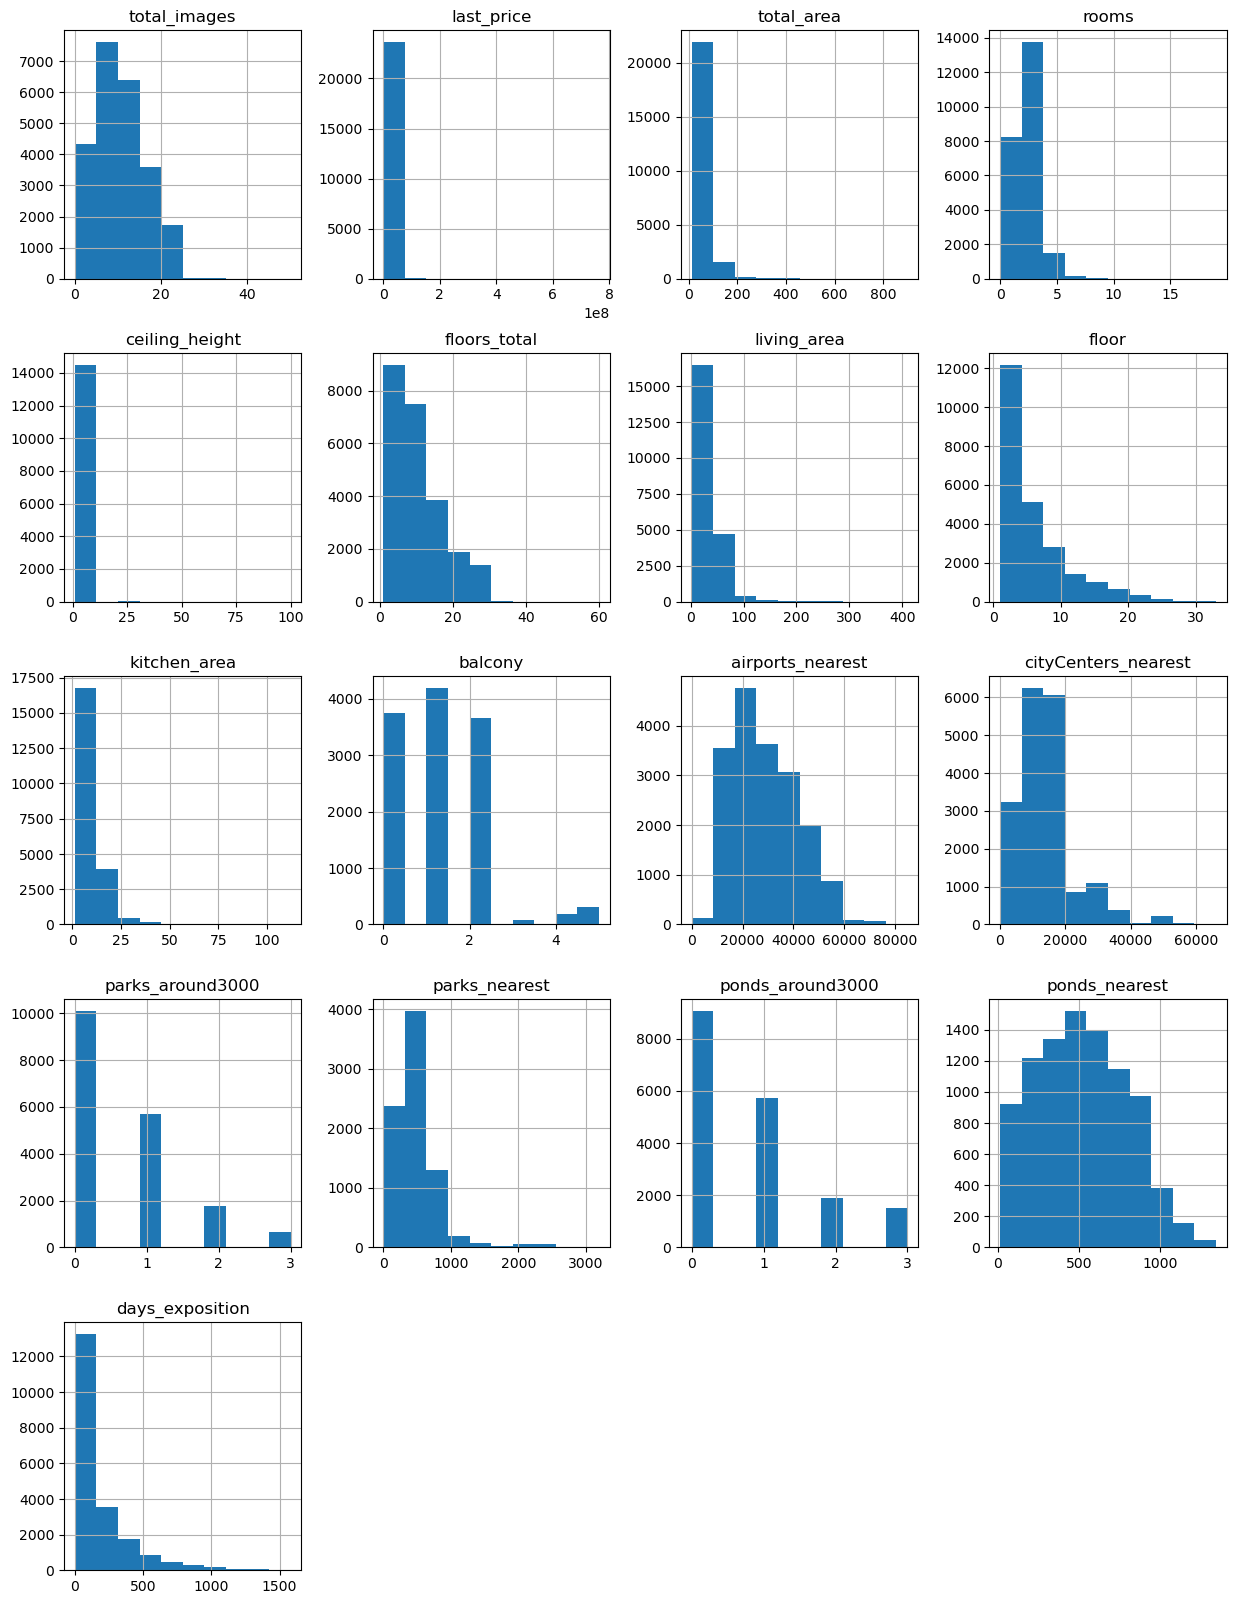

In [102]:
#Построили гистрограмму по каждому столбцу таблицы data
data.hist(figsize=(15, 20))

# Вывод 

<span style="color:blue"> 
    
Осмотрели данные
    
-посмотрими датасет

-сделали предварительные выводы

-нашли аномали в data.describe()

-Обнаружили пропущенных значений в количестве от 50 до 20 тысяч в разных столбцах, надо детально изучать каждый столбец с пропусками.

-Обнаружено множество столбцов с неверным форматом данных float64, int, boll, требуют предобработки данных.

-Обнаружены столбцы в которых указаны расстояние до центра, аэропорта, парка, прудов, но в столбце не указана единца измерения.

-Обнаружены столбцы kitchen_area, living_area и total_area, в которых можно указать единцы измерения m2
 <span>


In [103]:
#Перемеименуем колонки для общего удобства работы с данными  и проверим что переименовались data.info() 
data = data.rename(columns = {'cityCenters_nearest': 'citycenters_nearest_meters',
                      'parks_around3000': 'parks_around3000_km',
                      'ponds_around3000': 'ponds_around3000_km',
                       'parks_nearest': 'parks_nearest_meters',
                       'ponds_nearest': 'ponds_nearest_meters',
                        'kitchen_area': 'kitchen_area_m2',
                        'living_area': 'living_area_m2',
                         'total_area': 'total_area_m2' })
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23699 non-null  int64  
 1   last_price                  23699 non-null  float64
 2   total_area_m2               23699 non-null  float64
 3   first_day_exposition        23699 non-null  object 
 4   rooms                       23699 non-null  int64  
 5   ceiling_height              14504 non-null  float64
 6   floors_total                23613 non-null  float64
 7   living_area_m2              21796 non-null  float64
 8   floor                       23699 non-null  int64  
 9   is_apartment                2775 non-null   object 
 10  studio                      23699 non-null  bool   
 11  open_plan                   23699 non-null  bool   
 12  kitchen_area_m2             21421 non-null  float64
 13  balcony                     121

In [104]:
#Новые данные с переименнованными столбацми, работаем с ними
data.head(20)

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,balcony,locality_name,airports_nearest,citycenters_nearest_meters,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [105]:
#Снова выводим пропуски и начнем их обрабатывать
data.isna().sum().sort_values()

total_images                      0
open_plan                         0
floor                             0
rooms                             0
studio                            0
total_area_m2                     0
last_price                        0
first_day_exposition              0
locality_name                    49
floors_total                     86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_around3000_km            5518
parks_around3000_km            5518
citycenters_nearest_meters     5519
airports_nearest               5542
ceiling_height                 9195
balcony                       11519
ponds_nearest_meters          14589
parks_nearest_meters          15620
is_apartment                  20924
dtype: int64

In [106]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [107]:
#Гипотеза - очень странно что пропущено 49 мест проживания людей? Они не знают где живут?
#Выведем уникальные значения locality_name 
#Огромный спискок- самая большая в нем проблема это возможно буква е и ё. 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [108]:
# заменили ё на e и приведли к одному виду все , без regex=True неработало. взял с pandas.pydata.org
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
#Проверили все заменилось
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [109]:
#Пропуски так и остались но данные не будут групироваться в разные строки зависимости от ё и е 
data['locality_name'].isna().sum()

49

In [110]:
#Принято решение удалить 49 строк так как мы не знаем место положение квартир
data = data.dropna(subset=['locality_name'])
#Проверили, пропусков больше нету 
data['locality_name'].isna().sum()

0

In [111]:
#Первое что можно увидеть формат floors_total - float64,
#этажи это целые числа, надо сделать формат int
#Гипотеза - значений в которых нет этажей очень мало. очень странно что их не заполнили
#Медианой такие значение, наверно заполнять будет не верно , их проще отбросить.
#посмотрели уникальные значения
data['floors_total'].unique()
data = data.dropna(subset=['floors_total'])
#Поменяли тип данных
data['floors_total'] = data['floors_total'].astype('int')
#Проверили что тип данных сменился
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23565 non-null  int64  
 1   last_price                  23565 non-null  float64
 2   total_area_m2               23565 non-null  float64
 3   first_day_exposition        23565 non-null  object 
 4   rooms                       23565 non-null  int64  
 5   ceiling_height              14481 non-null  float64
 6   floors_total                23565 non-null  int32  
 7   living_area_m2              21700 non-null  float64
 8   floor                       23565 non-null  int64  
 9   is_apartment                2760 non-null   object 
 10  studio                      23565 non-null  bool   
 11  open_plan                   23565 non-null  bool   
 12  kitchen_area_m2             21343 non-null  float64
 13  balcony                     120

<span style="color:blue">В data.describe() я увидел, что в колонку rooms, есть значение равноe 0.
Гипотеза, не может быть комнат 0, мы изучаем данные по жилым помещение.
Средний м2 у жилого помещения со значение 0 равен 18.8 м2, а средне значение у жилого помещения с 1 комнатой равен 17.8 м2
Предлагаю обьеденить жилые помещения которые имеют 0 комнат и 1 комнату.<span>

In [112]:
#Уведились что есть значение равное 0
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [113]:
# Заменили значение 0 комнат на 1 комнату
data['rooms'] = data['rooms'].replace(0, 1)
#Проверили что значения 0 комнат больше нету
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [114]:
#Можем заполнить пропуски living_area_m2 средним по rooms , чем больше комнат тем больше жилая.
data['rooms'].unique()
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area_m2'].isna()), 'living_area_m2'] = \
    data.loc[(data['rooms'] == t), 'living_area_m2'].median()
#Пропусков нету
data['living_area_m2'].isna().sum() 

0

In [115]:
#Можем сгрупировать rooms и living_area_m2, посмотреть логично ли выглядит групировка.
rooms_living_area_m2 = data.pivot_table(index='rooms',values='living_area_m2', aggfunc=['count','median'])
#Жилые помещения увеличивают  жилую площадь в зависисти от количества комнат. Все выглядит как в жизни.
rooms_living_area_m2

,count,median
,living_area_m2,living_area_m2
rooms,,
1,8198,17.600
2,7897,30.500
3,5779,45.000
4,1172,63.650
5,325,91.785
6,104,124.400
7,59,145.000
8,12,161.000


In [116]:
#Заполним kitchen_area_m2 средним как делали с living_area_m2 через rooms и сделаем сводную таблицу.
#Посмотрим на сколько значение укладываются в норму мира 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area_m2'].isna()), 'kitchen_area_m2'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area_m2'].median()
#Проверили нет пустых значений    
data['kitchen_area_m2'].isna().sum()

0

In [117]:
#Строим сводную таблицу проверим на сколько значения выглядт логичными
rooms_kitchen_area_m2 = data.pivot_table(index='rooms', values='kitchen_area_m2',
                                         aggfunc=['median','count'])
#Заполненые пустые данные выглядят реально 
rooms_kitchen_area_m2

,median,count
,kitchen_area_m2,kitchen_area_m2
rooms,,
1,9.00,8198
2,8.70,7897
3,9.50,5779
4,11.00,1172
5,15.10,325
6,19.75,104
7,20.00,59
8,25.00,12


<span style="color:blue">
У нас есть пропуски в days_exposition(сколько дней было размещено объявление (от публикации до снятия))

Гипотеза - мы заполнить пропуски через rooms, так как в data.describe() видно очень интересную зависимость 
1 комната, обьявление висело в среднем 45 дней
2 комнаты, обьявление висело в среднем 90 дней
3 комнаты, обьявление висело в среднем 232 дня
При среднем значении 2 комнаты обьявление висит 180 дней. 
Данные очень реалистичные, чем меньше комнат, тем выше ликвидность жилого помещения на рынке и данное суждение верно и наоборот, чем больше комнат тем ликвидность ниже. <span>


In [118]:
#Заполним days_exposition средним значением через rooms, как делали выше с kitchen_area_m2
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['rooms'] == t), 'days_exposition'].median()
#Проверили нет пустых значений    
data['days_exposition'].isna().sum()
data_rooms = data.pivot_table(index='rooms', values='days_exposition')
data_rooms

,days_exposition
rooms,
1,150.082459
2,162.338103
3,188.710850
4,233.599829
5,280.695385
6,257.250000
7,175.593220
8,379.250000
9,466.500000


#Изменим тип days_exposition они сейча float64, а дни это целые числа, значит сделаем int64
data['days_exposition'] = data['days_exposition'].astype('int')
Проверяем замену типа данных
data.info()

<div class="alert alert-block alert-info">
     
-Пунк 1  Код ниже использует данные которые я решал ниже. и при запуске выдает ошибки. нужно вручную все запустить, тогда работает. не знаю как это решить =( 
    
-Пункт 2  Построил сводные таблицы по всем годам. отдельно сделала срезы по каждому году и добавли график из задания ниже.
Будем разбираться! 
    
-Пункт 3  Построил сводные таблицы по всем годам. отдельно сделала срезы по каждому году и добавли график из задания ниже.
Будем разбираться!
    
-Пунк 4 Разбор проделанной работы.
Количество размещений в 2014 году самое низкое это видно по первой сводной таблице, всего 69 обьявлений и 6 пропусков! ничего страшно в этом нет, причина простая , на графике мы видим цену. Она выше, чем 2015-2019 года.
Среднее количество всех дней разменещение тоже самое большое 915 дней. Ожидание продажи потверждает низкий спрос.
    
В 2015 году идет резкий рост количества размещений, который составляет 844 обьявлений за год , пропуски тоже немного выросли до 35. Считаю не кретично. Цена на квартиры пошла вниз и обьявления в среднем после публикации находятся активными 630 дней , все что происходит на графике и в таблицах логично. 
    
В 2016 году мы наблюдаем минимальную цену на обьекты в нашем датасете, количество обьявлений выросло до 2217 шт., пропусков всего 36, при таком росте количества обьявлений, предположу что результат идеальный! Также средня длительность размещеных составляет 313 дней. Рынок недвижимости расцвел!

В 2017 году самое большое количество обьявлений 6663 шт. , пропусков года размещения обьявлений тоже стало больше 153 штуки. Цена на обьекты выросла но не значительно, предпологаю это и постегнуло спрос на жилье. никто не хочет вернуться к ценам 2014 года. Средняя длительность размещенных обьявлений составляет в 2017 году 151. Рекорд! Рынок недвижимости похож на горячие пирожки!

В 2018 году количество размещенныз обьявлений составил 6499 штук, второй крупных показатель из всех имеющихся у нас, по годам.
Цена еще немного выросла в сравнении с 2017 годом, но не значительно. Обьекты покупают сейчас те, кто долго думал. 
Пропуски значительно выросли  и составили 641 шт. Средняя длительность размещенных обьявлений составила 90 дней.
Рынок накалился до красна!
    
В 2019 году мы видим значительный рост стоимости обьктов относительно 2016-2018 года. Количество размещенных обьявлений составляет всего 947 штук. Данное значение немного больше чем в 2015 году, которые было 844 штуки. НО самое важное пропусков стало катастрофически много и составило 1406. Из за такого огромного количество пропусков сводная таблица нам выдает что в среднем размещенные обьявления висели около 30 дней.

    
Предположу если сложить 2019 год количество размещенных обьявлений с пропусками мы получим значение равное 2353 шт - данное значение близко к 2016 году. Но считаю что нельзя заполнить все средним значением 2016 года. По причине среднее размещение составляет 313 дней. Будут искажения. Стоит оставить все как есть. Все пропуски можно учитывать как 2018-2019 год.
    
Причина пропусков большой спрос на рынке или сбой в программе, если данные заносились автоматически. Возможно не внимательность людей. 

Итог проведенного исследования мы не можем заполнить пропуски, чтобы они не влияли на ход иследования.
Думаю что данные пропуски не являются случайными.
Возможно случайные пропуски были в 2014, 2015 и 2016 и 2017 год - из за количество обьялений думаю в 2017 году тоже пропуски случайны. Общее количество пропусков за эти года составляет 230 штук.
</div>

In [119]:
#Из за пропусков нельзя сменить тип даных, убрал все знакил после запетой, применив .round(decimals=0)
data['days_exposition'].round(decimals=0)
data['days_exposition'].head()

0    114.0
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

In [120]:
#Построили сводную даблицу год когда выставили на продажу обьект и количество обьявлений в этот год.
first_year_all = data.pivot_table(index='first_year_expositio', values='days_exposition', aggfunc='count')
first_year_all.sort_values(by='days_exposition')

KeyError: 'first_year_expositio'

In [121]:
#Построили сводную таблицу год когда выставили на продажу обьект  и сколько в среднем обьявления были актуальны.
first_year_all = data.pivot_table(index='first_year_expositio', values='days_exposition', aggfunc='mean')
first_year_all.sort_values(by='days_exposition').round(decimals=0)

KeyError: 'first_year_expositio'

In [122]:
#Взяли срез по 2014 году и проверили сколько пропусков
year_2014 = data.query('first_year_expositio == 2014')
year_2014['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [123]:
#Взяли срез по 2015 году и ппроверили сколько пропусков
year_2015 = data.query('first_year_expositio == 2015')
year_2015['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [20]:
#Взяли срез по 2016 году и проверили сколько пропусков
year_2016 = data.query('first_year_expositio == 2016')
year_2016['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [21]:
#Взяли срез по 2017 году и проверили сколько пропусков
year_2017 = data.query('first_year_expositio == 2017')
year_2017['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [22]:
#Взяли срез по 2018 году и проверили сколько пропусков
year_2018 = data.query('first_year_expositio == 2018')
year_2018['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [23]:
#Взяли срез по 2019 году и проверили сколько пропусков
year_2019 = data.query('first_year_expositio == 2019')
year_2019['days_exposition'].isna().sum()

UndefinedVariableError: name 'first_year_expositio' is not defined

In [124]:
#Посчитали количество пропусков с 2014 по 2017 год
passes2015_2017 = year_2015['days_exposition'].isna().sum() + year_2016['days_exposition'].isna().sum() + \
year_2017['days_exposition'].isna().sum() + year_2014['days_exposition'].isna().sum()
passes2015_2017

NameError: name 'year_2015' is not defined

In [125]:
#Построили график год размещение к цене обьекта(взяли зи задач ниже)
data.pivot_table(index='first_year_expositio', values='last_price').plot(grid=True, kind= 'line', figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Год размещения')

KeyError: 'first_year_expositio'

<span style="color:blue">Гипотеза
Столбцы ponds_around3000_km и parks_around3000_km имеют одинаковое значение пропущенных значений по 5518 строк.
Также в столбцах ponds_around3000_km и parks_around3000_km есть значение 0.
Предпологаемое решение
Раз люди не указали сколько в радиусе 3км есть прудов или парков значит пустые значения равны 0.
Предогаю значения nan заполнить нулями, а столбцы переименовать.<span>


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23565 non-null  int64  
 1   last_price                  23565 non-null  float64
 2   total_area_m2               23565 non-null  float64
 3   first_day_exposition        23565 non-null  object 
 4   rooms                       23565 non-null  int64  
 5   ceiling_height              14481 non-null  float64
 6   floors_total                23565 non-null  int32  
 7   living_area_m2              23565 non-null  float64
 8   floor                       23565 non-null  int64  
 9   is_apartment                2760 non-null   object 
 10  studio                      23565 non-null  bool   
 11  open_plan                   23565 non-null  bool   
 12  kitchen_area_m2             23565 non-null  float64
 13  balcony                     120

<span style="color:blue">Гипотеза: в столбцах parks_nearest_meters и ponds_nearest_meters есть пропущенные столбцы. Значит владельцы жилых помещений не знали о расстоянии до ближайших прудов или парков, поэтому ничего не указали. Предлогаю заполнить пропущенные значения 0.</span>

# Примечание

После обработки данных было обнаружено что не правильно заполнять значения в parks_nearest_meters и ponds_nearest_meters нулями. Данный код оставлю, но сделаю не активным.

<span style="color:blue">
Гипотеза в столбца citycenters_nearest_meters и airports_nearest  есть пропущенные значения.
Их можно заполнить медианными значениями по столбцу locality_name.
Я сомневаюсь правильно ли это так как Города могут быть крупным и данные будут не очень настоящими. </span>

<span style="color:blue"> 
Можем мы оставить данные так столбцов airports_nearest и citycenters_nearest_meters ? или надо Человек при подаче данных о своей жилой площадей не указал их. Получается нам их и неоткуда взять?
</span>

<div class="alert alert-block alert-info">
Я забыл убрать этот год под ревью. Хотел показать почему мы не будем заполнять пропуски в данном случае.
Если мы их заполним то это будет влиять на результат.
    
</div>

<span style="color:blue"> Решил найти все значения меньше 2м и выше 8м и удалить их , так как выбросы.
Не знаю на сколько это верное решение 
А пропущенные значения можем заполнить медианным значением  из data.describe() 2.77 
</span>

<div class="alert alert-block alert-info">
Применил код, который ты добавил и использовал замену пропусков из ссылки. 
Средний высота потолков была  2.77 метра , в новом варианте средня высота полтолков 2.65 метра - соглашусь 2.65 метра ближе к истене. 
Спасибо !:) 
    
</div>

In [127]:
#Cмотрим уникальные высоты потолков
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [128]:
#Взяли медианные даныные из data.describe() и заполнили пустые значения
#Проверили что нету больше пропущенных значений 
#data['ceiling_height'] = data['ceiling_height'].fillna(2.77)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data['ceiling_height'].isna().sum()
data['ceiling_height'].median()

2.65

In [129]:
#Заменили пропуски средним значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [130]:
#проверили что пропусков нету 
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<span style="color:blue">Долго думал как избавиться от значейний больше 8. Не нашел способа подвинуть точку в 24.  на 2.4 - значений таких не много принял решение их удалить. Подумал что можем считать их выбросами. Так как есть значения и 1 и 100. </span>

In [131]:
#Сделали условие и перезаписали датафрейм
#Проверили что уникальные значения изменились
data = data.loc[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 8)]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47,
       3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 5.5 ,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.49, 4.

<span style="color:blue"> В столбце balcony есть пропущенные значения и есть значения 0, 
предпологаю что владельцы жилых помещений, не указывали данные когда балконы отсутствовали.
Предлогаю заполнить пропуски нулями
Так же столбец balcony имеет формат float64 изменим на int64 - балконы это целые числа 
</span>

In [132]:
#Вывели уникальные значения балконов
#Заполнили пропуски нулями
#Проверили что пропусков 0
data['balcony'].unique()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\2817082860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].fillna(0)


0

In [133]:
#Изменили тип с float64 на int64
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23541 non-null  int64  
 1   last_price                  23541 non-null  float64
 2   total_area_m2               23541 non-null  float64
 3   first_day_exposition        23541 non-null  object 
 4   rooms                       23541 non-null  int64  
 5   ceiling_height              23541 non-null  float64
 6   floors_total                23541 non-null  int32  
 7   living_area_m2              23541 non-null  float64
 8   floor                       23541 non-null  int64  
 9   is_apartment                2756 non-null   object 
 10  studio                      23541 non-null  bool   
 11  open_plan                   23541 non-null  bool   
 12  kitchen_area_m2             23541 non-null  float64
 13  balcony                     235

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\4048778461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype(int)


<span style="color:blue"> Столбец is_apartment имеет пропуски, потому что имеет тип object, изменим его на bool  и все пропуски исчезнут.
Значения примут формат True или False</span>

In [134]:
#Меняем формат столбца is_apartment c object на bool
#Проверяем изменения
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23541 non-null  int64  
 1   last_price                  23541 non-null  float64
 2   total_area_m2               23541 non-null  float64
 3   first_day_exposition        23541 non-null  object 
 4   rooms                       23541 non-null  int64  
 5   ceiling_height              23541 non-null  float64
 6   floors_total                23541 non-null  int32  
 7   living_area_m2              23541 non-null  float64
 8   floor                       23541 non-null  int64  
 9   is_apartment                23541 non-null  bool   
 10  studio                      23541 non-null  bool   
 11  open_plan                   23541 non-null  bool   
 12  kitchen_area_m2             23541 non-null  float64
 13  balcony                     235

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\2803050031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_apartment'] = data['is_apartment'].astype('bool')


In [135]:
#Проверяем пропуски - пропуски остались только в двух столбцах airports_nearest и citycenters_nearest_meters  
data.isna().sum()

total_images                      0
last_price                        0
total_area_m2                     0
first_day_exposition              0
rooms                             0
ceiling_height                    0
floors_total                      0
living_area_m2                    0
floor                             0
is_apartment                      0
studio                            0
open_plan                         0
kitchen_area_m2                   0
balcony                           0
locality_name                     0
airports_nearest               5514
citycenters_nearest_meters     5491
parks_around3000_km            5490
parks_nearest_meters          15519
ponds_around3000_km            5490
ponds_nearest_meters          14513
days_exposition                   0
dtype: int64

In [136]:
#Считаем цену одного квадрата добавил столбец price_m2
#Поверили что добавился столбец
data['price_m2'] = data['last_price'] / data['total_area_m2']
data.head(20)

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\3871591402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_m2'] = data['last_price'] / data['total_area_m2']


,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest_meters,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition,price_m2
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114.0,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,True,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,45.00,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,True,...,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,True,...,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,30.50,22,True,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,91.0,110544.692737
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,True,...,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,True,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


<span style="color:blue">Я правильно понял задание, нам надо заполнить именно цифровыми значениями? 0 1 2 3 и т.д
Есть метод заполнять именно названиями понедельник, вторник, март, апрель</span>

In [137]:
# Изменили формат с object на Datetime64
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\805604573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')


In [138]:
#Создали 3 колонки отдельно с day, month, year.
#Вывели таблицу, проверили что данные стоолбы появились
data['first_day_week_expositio'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['first_month_expositio'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_year_expositio'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head(20)

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\1941080626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_week_expositio'] = pd.DatetimeIndex(data['first_day_exposition']).day
C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\1941080626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_month_expositio'] = pd.DatetimeIndex(data['first_day_exposition']).month
C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\1941080626.py:5: SettingWithCopyWarning: 
A value is trying to be se

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,citycenters_nearest_meters,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition,price_m2,first_day_week_expositio,first_month_expositio,first_year_expositio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,16028.0,1.0,482.0,2.0,755.0,114.0,120370.370370,7,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,10,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,2,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,True,...,11634.0,0.0,NaN,0.0,NaN,91.0,110544.692737,18,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,23,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,26,2,2017


In [139]:
#Изменили тип данных в столбце floors_total c float64 на int , этажи всегда целые числ.
#Проверили изменения
data['floors_total'] = data['floors_total'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23541 non-null  int64         
 1   last_price                  23541 non-null  float64       
 2   total_area_m2               23541 non-null  float64       
 3   first_day_exposition        23541 non-null  datetime64[ns]
 4   rooms                       23541 non-null  int64         
 5   ceiling_height              23541 non-null  float64       
 6   floors_total                23541 non-null  int32         
 7   living_area_m2              23541 non-null  float64       
 8   floor                       23541 non-null  int64         
 9   is_apartment                23541 non-null  bool          
 10  studio                      23541 non-null  bool          
 11  open_plan                   23541 non-null  bool      

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\1074836210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype('int')


In [140]:
#Создали функцию  и заполнили новый столбец значениями первый, последний и другой этаж.
#Проверили что стоолбец добавился
def floor_first_last_any(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_first_last_any'] = data.apply(floor_first_last_any, axis=1)
data.head(20)

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\3007014204.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_first_last_any'] = data.apply(floor_first_last_any, axis=1)


,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition,price_m2,first_day_week_expositio,first_month_expositio,first_year_expositio,floor_first_last_any
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,1.0,482.0,2.0,755.0,114.0,120370.370370,7,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,0.0,NaN,155.0,99195.710456,2,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,True,...,0.0,NaN,0.0,NaN,91.0,110544.692737,18,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,189.0,87454.764777,23,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,0.0,NaN,289.0,88524.590164,26,2,2017,другой


In [141]:
data['citycenters_nearest_meters'] = data['citycenters_nearest_meters'] / 1000
data['citycenters_nearest_meters'] = data['citycenters_nearest_meters'].round(decimals=0)
data.head(20)


C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\63315534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['citycenters_nearest_meters'] = data['citycenters_nearest_meters'] / 1000
C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\63315534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['citycenters_nearest_meters'] = data['citycenters_nearest_meters'].round(decimals=0)


,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition,price_m2,first_day_week_expositio,first_month_expositio,first_year_expositio,floor_first_last_any
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,1.0,482.0,2.0,755.0,114.0,120370.370370,7,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,0.0,NaN,155.0,99195.710456,2,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,True,...,0.0,NaN,0.0,NaN,91.0,110544.692737,18,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,NaN,NaN,189.0,87454.764777,23,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,0.0,NaN,289.0,88524.590164,26,2,2017,другой


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23541 non-null  int64         
 1   last_price                  23541 non-null  float64       
 2   total_area_m2               23541 non-null  float64       
 3   first_day_exposition        23541 non-null  datetime64[ns]
 4   rooms                       23541 non-null  int64         
 5   ceiling_height              23541 non-null  float64       
 6   floors_total                23541 non-null  int32         
 7   living_area_m2              23541 non-null  float64       
 8   floor                       23541 non-null  int64         
 9   is_apartment                23541 non-null  bool          
 10  studio                      23541 non-null  bool          
 11  open_plan                   23541 non-null  bool      

In [143]:
#Изменили порядок колоно в data для удобно работы 
data = data.reindex(columns=['locality_name', 'last_price', 'price_m2',
                             'total_area_m2', 'rooms' ,'living_area_m2',
                             'kitchen_area_m2' , 'balcony', 'ceiling_height',
                            'floor', 'floors_total','floor_first_last_any',
                            'is_apartment', 'studio', 'open_plan',
                            'citycenters_nearest_meters', 'airports_nearest', 'number_parksponds_around3000_km',
                            'parks_nearest_meters', 'ponds_nearest_meters',
                            'first_day_exposition', 'first_day_week_expositio', 'first_month_expositio',
                            'first_year_expositio', 'days_exposition', 'total_images'])
data.head(20)

,locality_name,last_price,price_m2,total_area_m2,rooms,living_area_m2,kitchen_area_m2,balcony,ceiling_height,floor,...,airports_nearest,number_parksponds_around3000_km,parks_nearest_meters,ponds_nearest_meters,first_day_exposition,first_day_week_expositio,first_month_expositio,first_year_expositio,days_exposition,total_images
0,Санкт-Петербург,13000000.0,120370.370370,108.00,3,51.00,25.00,0,2.70,8,...,18863.0,NaN,482.0,755.0,2019-03-07,7,3,2019,114.0,20
1,поселок Шушары,3350000.0,82920.792079,40.40,1,18.60,11.00,2,2.65,1,...,12817.0,NaN,NaN,NaN,2018-12-04,4,12,2018,81.0,7
2,Санкт-Петербург,5196000.0,92785.714286,56.00,2,34.30,8.30,0,2.65,4,...,21741.0,NaN,90.0,574.0,2015-08-20,20,8,2015,558.0,10
3,Санкт-Петербург,64900000.0,408176.100629,159.00,3,45.00,9.50,0,2.65,9,...,28098.0,NaN,84.0,234.0,2015-07-24,24,7,2015,424.0,0
4,Санкт-Петербург,10000000.0,100000.000000,100.00,2,32.00,41.00,0,3.03,13,...,31856.0,NaN,112.0,48.0,2018-06-19,19,6,2018,121.0,2
5,городской поселок Янино-1,2890000.0,95065.789474,30.40,1,14.40,9.10,0,2.65,5,...,NaN,NaN,NaN,NaN,2018-09-10,10,9,2018,55.0,10
6,поселок Парголово,3700000.0,99195.710456,37.30,1,10.60,14.40,1,2.65,6,...,52996.0,NaN,NaN,NaN,2017-11-02,2,11,2017,155.0,6
7,Санкт-Петербург,7915000.0,110544.692737,71.60,2,30.50,18.90,2,2.65,22,...,23982.0,NaN,NaN,NaN,2019-04-18,18,4,2019,91.0,5
8,поселок Мурино,2900000.0,87454.764777,33.16,1,15.43,8.81,0,2.65,26,...,NaN,NaN,NaN,NaN,2018-05-23,23,5,2018,189.0,20
9,Санкт-Петербург,5400000.0,88524.590164,61.00,3,43.60,6.50,2,2.50,7,...,50898.0,NaN,NaN,NaN,2017-02-26,26,2,2017,289.0,18


In [144]:
#Переименовали столбцы для более удобной работы 
#Проверили что нейминг присвоился корректно
data = data.rename(columns = {'locality_name': 'town_name',
                      'airports_nearest': 'airports_nearest_km',
                      'number_parksponds_around3000_km': 'number_parksponds_around3000',
                       'parks_nearest_meters': 'parks_nearest_m',
                       'ponds_nearest_meters': 'ponds_nearest_m',
                       'citycenters_nearest_meters': 'citycenters_nearest_km'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   town_name                     23541 non-null  object        
 1   last_price                    23541 non-null  float64       
 2   price_m2                      23541 non-null  float64       
 3   total_area_m2                 23541 non-null  float64       
 4   rooms                         23541 non-null  int64         
 5   living_area_m2                23541 non-null  float64       
 6   kitchen_area_m2               23541 non-null  float64       
 7   balcony                       23541 non-null  int32         
 8   ceiling_height                23541 non-null  float64       
 9   floor                         23541 non-null  int64         
 10  floors_total                  23541 non-null  int32         
 11  floor_first_last_any        

<span style="color:blue">Вижу в data.describe() выбросы. нашел функцию по их удалению и решил ее применить.<span>

Text(0, 0.5, 'Площадь Кухонь м2')

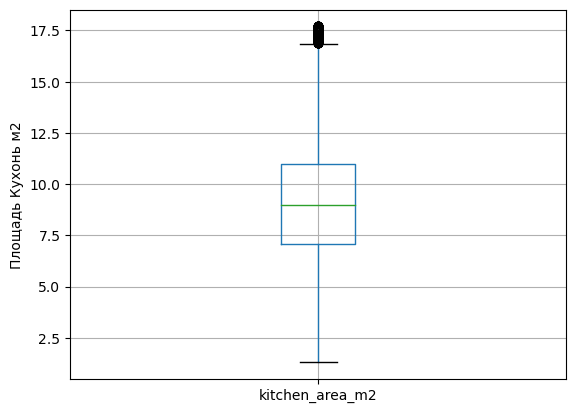

In [145]:
#Удаляем выбросы в kitchen_area_m2
Q1 =  data['kitchen_area_m2'].quantile(0.25)
Q3 = data['kitchen_area_m2'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['kitchen_area_m2'] > (Q1-1.5*IQR)) & (data['kitchen_area_m2'] < (Q3+1.5*IQR))]
data.boxplot(column="kitchen_area_m2")
plt.ylabel('Площадь Кухонь м2')

Text(0, 0.5, 'Высота потолков')

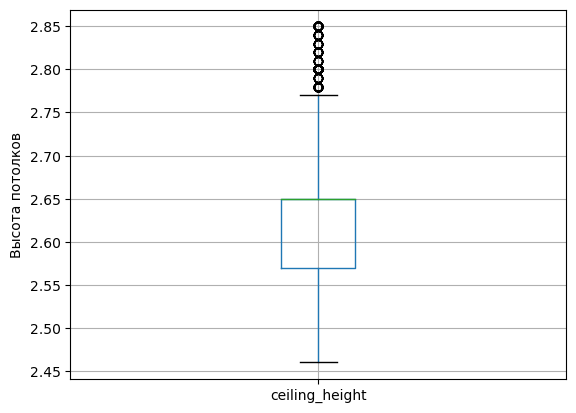

In [146]:
#Удаляем выбросы в ceiling_height
Q1 =  data['ceiling_height'].quantile(0.25)
Q3 = data['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['ceiling_height'] > (Q1-1.5*IQR)) & (data['ceiling_height'] < (Q3+1.5*IQR))]
data.boxplot(column="ceiling_height")
plt.ylabel('Высота потолков')

Text(0, 0.5, 'Общая площадь м2')

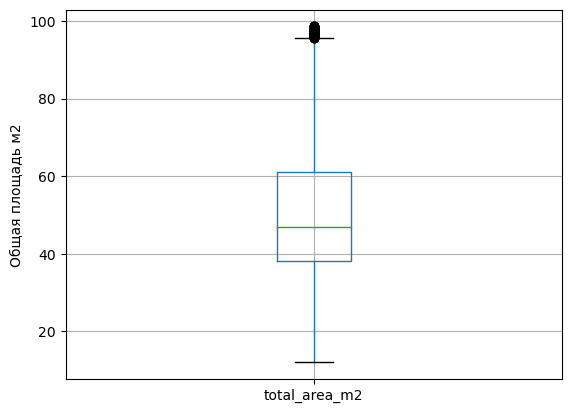

In [147]:
#Удаляем выбросы в total_area_m2
Q1 =  data['total_area_m2'].quantile(0.25)
Q3 = data['total_area_m2'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['total_area_m2'] > (Q1-1.5*IQR)) & (data['total_area_m2'] < (Q3+1.5*IQR))]
data.boxplot(column="total_area_m2")
plt.ylabel('Общая площадь м2')

Text(0, 0.5, 'Всего этажей')

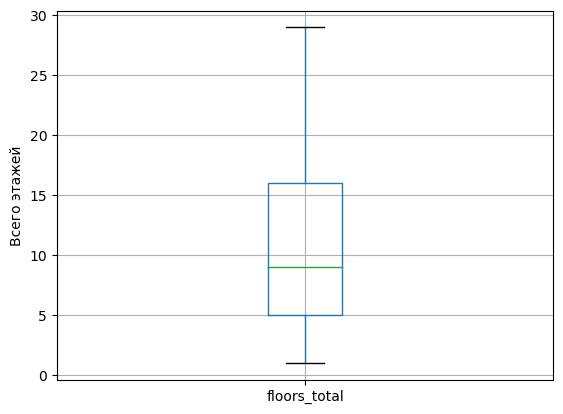

In [148]:
#Удаляем выбросы в floors_total
Q1 =  data['floors_total'].quantile(0.25)
Q3 = data['floors_total'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['floors_total'] > (Q1-1.5*IQR)) & (data['floors_total'] < (Q3+1.5*IQR))]
data.boxplot(column="floors_total")
plt.ylabel('Всего этажей')

Text(0, 0.5, 'Цена за м2')

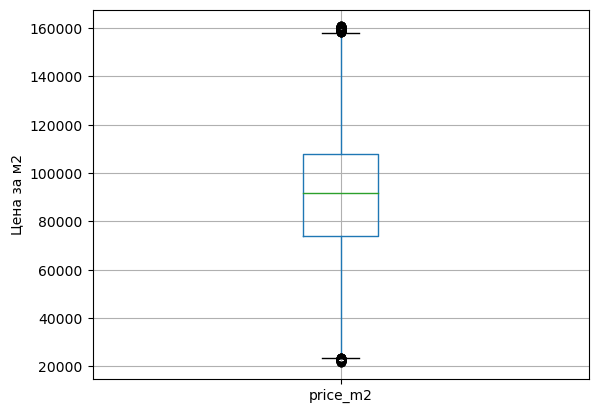

In [149]:
#Удаляем выбросы в price_m2
Q1 =  data['price_m2'].quantile(0.25)
Q3 = data['price_m2'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['price_m2'] > (Q1-1.5*IQR)) & (data['price_m2'] < (Q3+1.5*IQR))]
data.boxplot(column="price_m2")
plt.ylabel('Цена за м2')

In [150]:
#Проверяем data.describe() на наличие выбросов
data.describe()

,last_price,price_m2,total_area_m2,rooms,living_area_m2,kitchen_area_m2,balcony,ceiling_height,floor,floors_total,citycenters_nearest_km,airports_nearest_km,number_parksponds_around3000,parks_nearest_m,ponds_nearest_m,first_day_week_expositio,first_month_expositio,first_year_expositio,days_exposition,total_images
count,1.847300e+04,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000,13591.000000,13582.000000,0.0,5232.000000,6235.000000,18473.000000,18473.000000,18473.000000,18473.000000,18473.000000
mean,4.564535e+06,90598.768976,50.705442,1.873112,29.092693,9.018959,0.615709,2.626409,6.060900,11.151789,15.765212,29270.675674,NaN,499.170872,541.876183,15.464624,6.392411,2017.387647,159.034591,9.638012
std,2.022840e+06,26773.955566,16.180021,0.847147,11.727701,2.616222,0.943652,0.081207,4.936773,6.567496,8.232850,13323.412035,NaN,332.501033,275.689026,8.638859,3.487033,1.011172,194.942694,5.511791
min,6.500000e+05,21568.627451,13.000000,1.000000,2.000000,1.300000,0.000000,2.460000,1.000000,1.000000,0.000000,6450.000000,NaN,1.000000,13.000000,1.000000,1.000000,2014.000000,1.000000,0.000000
25%,3.237314e+06,73972.602740,38.000000,1.000000,18.000000,7.000000,0.000000,2.550000,2.000000,5.000000,12.000000,17604.000000,NaN,302.000000,330.000000,8.000000,3.000000,2017.000000,45.000000,6.000000
50%,4.200000e+06,91666.666667,47.000000,2.000000,28.700000,9.000000,0.000000,2.650000,5.000000,9.000000,14.000000,28098.000000,NaN,466.000000,527.000000,15.000000,6.000000,2017.000000,91.000000,9.000000
75%,5.500000e+06,107676.348548,61.000000,2.000000,37.500000,10.500000,1.000000,2.650000,8.000000,16.000000,17.000000,39141.000000,NaN,623.000000,751.000000,23.000000,10.000000,2018.000000,186.000000,13.000000
max,1.550000e+07,160737.812912,98.610000,6.000000,91.785000,17.700000,5.000000,2.850000,27.000000,29.000000,66.000000,84869.000000,NaN,3190.000000,1344.000000,31.000000,12.000000,2019.000000,1580.000000,39.000000


In [151]:
# Проверяем сколько строк осталось, все не так плоха. было 25тысяч осталось 19.500 тысяч! 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18473 entries, 1 to 23698
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   town_name                     18473 non-null  object        
 1   last_price                    18473 non-null  float64       
 2   price_m2                      18473 non-null  float64       
 3   total_area_m2                 18473 non-null  float64       
 4   rooms                         18473 non-null  int64         
 5   living_area_m2                18473 non-null  float64       
 6   kitchen_area_m2               18473 non-null  float64       
 7   balcony                       18473 non-null  int32         
 8   ceiling_height                18473 non-null  float64       
 9   floor                         18473 non-null  int64         
 10  floors_total                  18473 non-null  int32         
 11  floor_first_last_any        

# Вывод

<span style="color:blue"> 
    
-Определены пропущенные значения
    
-Заполнены пропущенные значения там, где это возможно
есть пояснение, какие пропущенные значения обнаружены
    
-Изменены типы данных,
есть пояснение, в каких столбцах изменены типы и почему
    
-Устранены неявные дубликаты в названиях населённых пунктов
    
-Устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
    
-Посчитано и добавлено в таблицу: цена одного квадратного метра
    
-Посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
    
-Посчитано и добавлено в таблицу: месяц публикации объявления
    
-Посчитано и добавлено в таблицу: год публикации объявления
    
-Посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
    
-Посчитано и добавлено в таблицу: расстояние в км до центра города
 
<span>

### Проведите исследовательский анализ данных

<span style="color:blue"> 
На гистограмме видно, что у нас много обьектов в диапозоне площадью от 30м2 и до 50м2.
<span>

Text(0.5, 0, 'общая площадь')

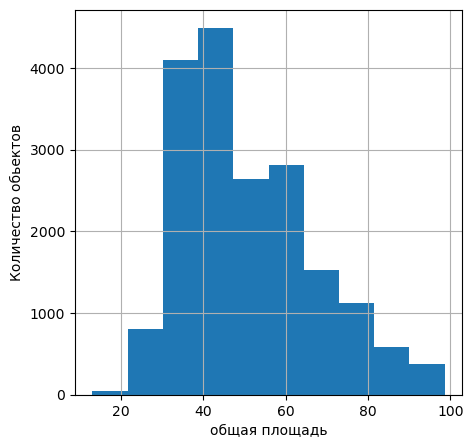

In [152]:
#Строим гистрограммы после обработки данных
data['total_area_m2'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('общая площадь')

<span style="color:blue"> 
    
На гистограмме видно, что жилая площадь имеет самое большое значение в диапозоне от 10м2 до 20m2.
    
Второе значение жилой площади по количеству лежит между 30м2 и 38м2.
<span>

Text(0.5, 0, 'Жилая площадь м2')

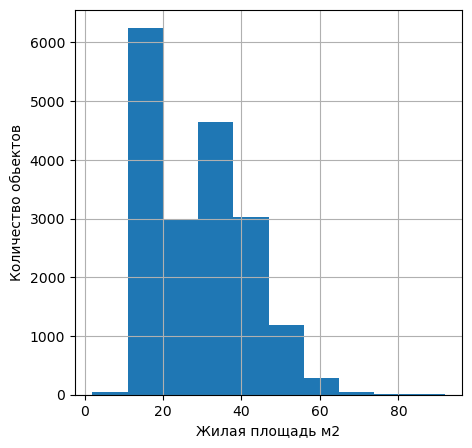

In [153]:
#Строим гистрограммы после обработки данных
data['living_area_m2'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Жилая площадь м2')

<span style="color:blue"> 
Самое большое количество значений  кухни находит между 7.5м2 и 9м2.
<span>

Text(0.5, 0, 'Кухня площадь м2')

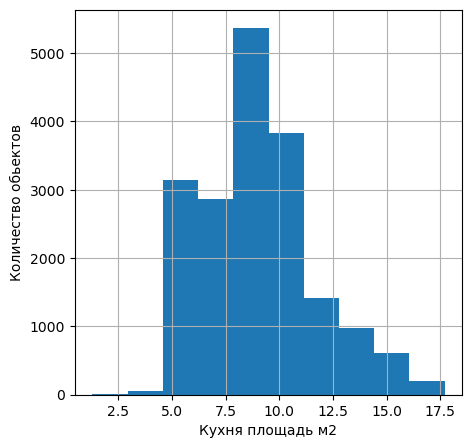

In [154]:
#Строим гистрограммы после обработки данных
data['kitchen_area_m2'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Кухня площадь м2')

<span style="color:blue"> 
На гистограмме видно что самое количество обьектов находят в ценовом диапозоне между 0.3 и 0.55
Второе значение по количеству находится между 0.2 и 0.3
Выглядит очень логично, количесто однокомнатных и двух комнатных квартир у вас самое большое.
<span>

Text(0.5, 0, 'Цена обьектов')

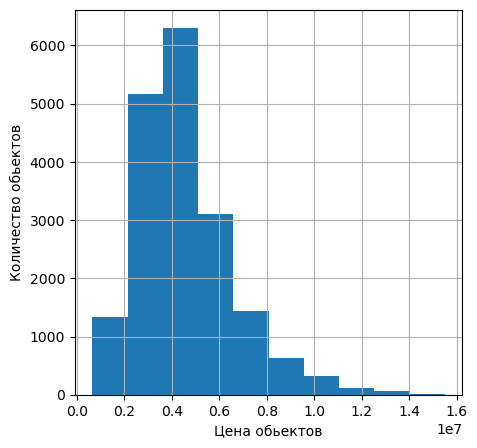

In [155]:
#Строим гистрограммы после обработки данных
data['last_price'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Цена обьектов')

<span style="color:blue"> 
Данная гистограмма подвеждает что у нас большое количество обьектов одна и двух комнатных.
<span>

Text(0.5, 0, 'количество комнат')

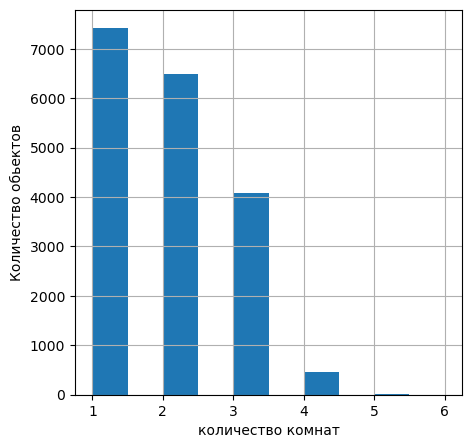

In [156]:
#Строим гистрограммы после обработки данных
data['rooms'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('количество комнат')

<span style="color:blue"> 
Гистограмма показывает нам о том что очень много квартир в которызх потолки высотой 2.77
<span>

Text(0.5, 0, 'Высота потолков')

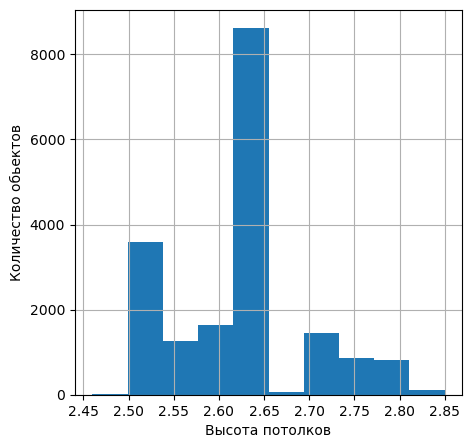

In [157]:
#Строим гистрограммы после обработки данных
data['ceiling_height'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Высота потолков')

<span style="color:blue"> 
    
На гистограмме видно , что много обьектов, которые имеют высоту в 1-3 этажа и второе значение по количеству 5.
Не удивительно в в нашем дата сете много сел, садовых обществ и деревень.
<span>   

Text(0.5, 0, 'Этажи обьктов')

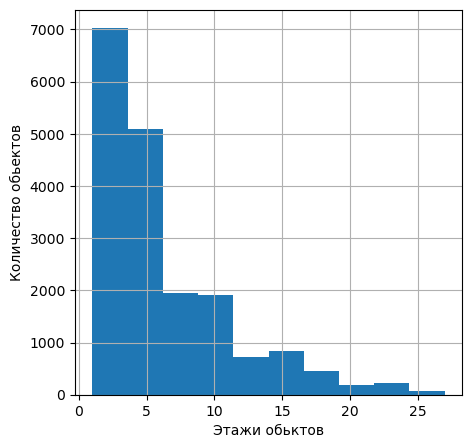

In [158]:
#Строим гистрограммы после обработки данных
data['floor'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Этажи обьктов')

<span style="color:blue"> 
На гистограмме видно,количество первых и последних этажей совпадает, превалируют все другие этажи.
<span>

Text(0.5, 0, 'Вид этажей')

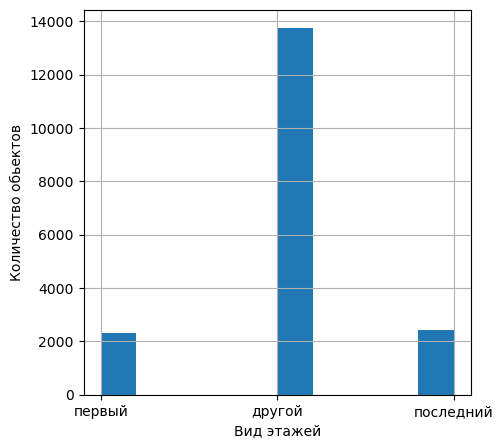

In [159]:
#Строим гистрограммы после обработки данных
data['floor_first_last_any'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Вид этажей')

<span style="color:blue"> 
Общее количество этажей имеет максимальное количество значений при 5 этажах.
В нашем датасете много 5ти этажных зданий.
<span>

Text(0.5, 0, 'Общее количество этажей')

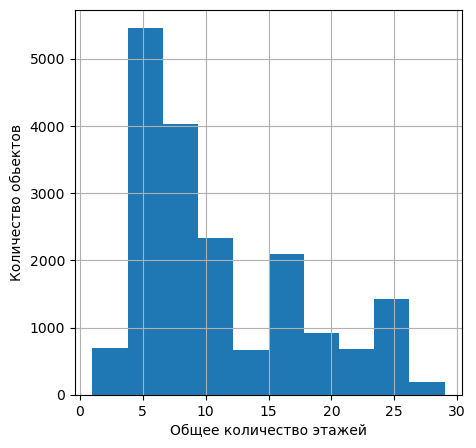

In [160]:
#Строим гистрограммы после обработки данных
data['floors_total'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Общее количество этажей')

<span style="color:blue"> 
На гистограмме видно удаленность обьектов от центра, большое количество жилых обьектов удалено от центра на 5-15 км.
Так как у нас самое большое количество обьявлений в Санкт-Петербуреге, все выглядит логично.
<span>

Text(0.5, 0, 'Расстояние до центра метры')

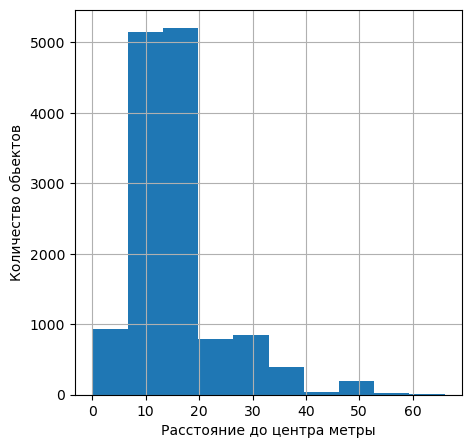

In [161]:
#Строим гистрограммы после обработки данных
data['citycenters_nearest_km'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Расстояние до центра метры')

<span style="color:blue"> 
Гистограмма показывает удаленность обьектов от аэропорта.
самое большое количество значених находится в диапозоне 15 км и 22км.
<span>

Text(0.5, 0, 'Расстояние до аэропорта метры')

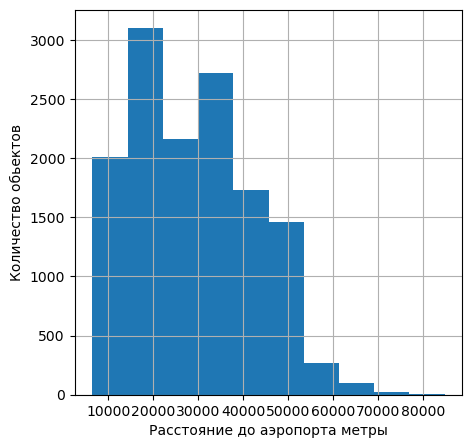

In [162]:
#Строим гистрограммы после обработки данных
data['airports_nearest_km'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Расстояние до аэропорта метры')

<span style="color:blue"> 
Большинство обьектов находит на расстоянии 500 метров от парка
<span>

Text(0.5, 0, 'Расстояние до парка метры')

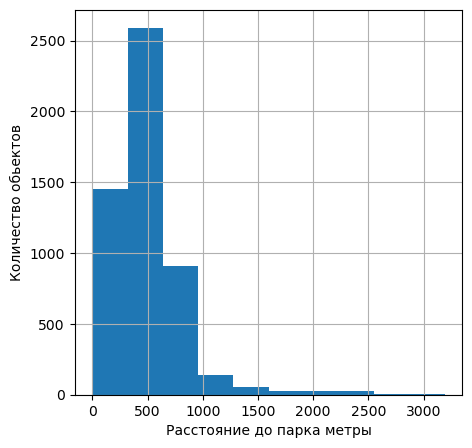

In [163]:
#Строим гистрограммы после обработки данных
data['parks_nearest_m'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('Расстояние до парка метры')

<span style="color:blue"> 
На гистограме видно, что обьявления публикую актвно каждый день, но более активно в начале недели в середине и в конце.
Публикации в месяц имеют высокую активность в начале месяца и в конце.
<span>

Text(0.5, 0, 'Месяц публикации обьекта')

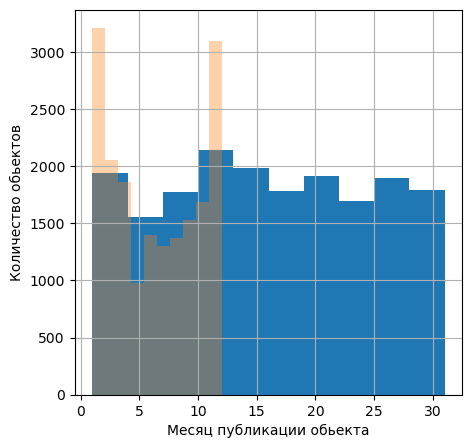

In [164]:
#Строим гистрограммы после обработки данных
data['first_day_week_expositio'].hist(figsize=(5, 5))
plt.ylabel('Количество обьектов')
plt.xlabel('День публикации обьекта')

data['first_month_expositio'].hist(figsize=(5, 5),alpha = 0.35)
plt.ylabel('Количество обьектов')
plt.xlabel('Месяц публикации обьекта')

# Вывод по построенным гистограммах

<span style="color:blue"> 
После всех обработак гистограмммы показывают, нормальные значения, без аномалий.
Также гистограммы подверждаю данные друг друга.
<span>

# Задача 1

<span style="color:blue">Изучаем как быстро продавались квартиры. Построим график, найдем среднее и медиану, сделаем сводную таблицу <span>

Text(0.5, 0, 'Время актуальности обьявления')

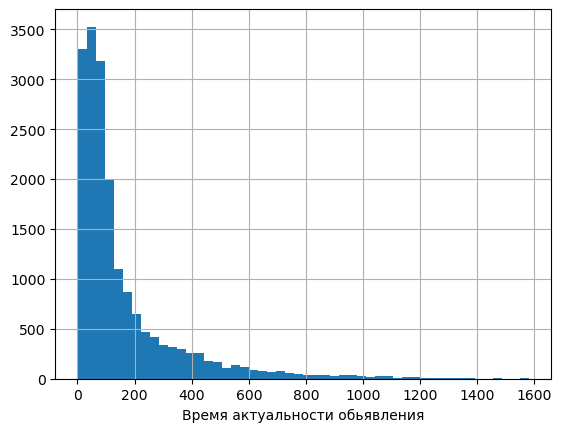

In [165]:
#Построили гистрограммму как быстро продавались квартиры 
data['days_exposition'].hist(bins=50)
plt.xlabel('Время актуальности обьявления')

In [166]:
#Средняя скорость продажи квартир
data['days_exposition'].mean()

159.0345910247388

In [167]:
#Медиана продажи квартиры
data['days_exposition'].median()

91.0

In [168]:
#Сделали групиировку по столбцу rooms и days_exposition
#Вывели таблицу
sell_living_quarters = data.groupby('rooms').agg({'days_exposition': ['mean', 'median'], 'rooms': ['count']})
sell_living_quarters

days_exposition        rooms
                 mean median count
rooms                             
1          149.316173   79.0  7420
2          156.286486   91.0  6482
3          178.633162  114.0  4089
4          179.908696  154.0   460
5          174.761905  127.0    21
6           12.000000   12.0     1

# Вывод задача 1

<span style="color:blue"> 

-Продажа квартиры сильно зависит от ее ликвидности.
Ны рынке жилье самые ликвидные квартиры одна и двух комнатные. Количество таких квартир в наших данных составляет - однокомнатной 7483 тысяча, двухкомнатная 6692. - самые популярные квартиры при продаже. 
На гисграмме и сводной таблице хорошо видно что данные квартиры продаются в среднем 149-156 дней, а  медиана составляет 79-91 день.
Можем назвать это самые быстрые продажи квартир.

-Долгая продажа составляет 236 дней. Жилье в котором 5 комнат в наших данных составляем 25 квартир. Данные кваритры не пользуются популярностью.

-Необычно быстрая продажа квартиры состоящей из 6 комнат всего 12 дней. Данная квартира у нас одна еденицы. Учитывать данные мы не будем по это продаже одна продажа не показазательна.
    
<span>

<div class="alert alert-block alert-info">
    
-Продажа квартиры сильно зависит от ее ликвидности.
Ны рынке жилье самые ликвидные квартиры одна и двух комнатные. Количество таких квартир в наших данных составляет - однокомнатной 7420 тысяча, двухкомнатная 6482. - самые популярные квартиры при продаже. 
На гисграмме и сводной таблице хорошо видно что данные квартиры продаются в среднем 156-164 дня, а  медиана составляет 79-88 день.
    
-Самая быстра продажа это обьект в котором 6 комнат был продан за 12 дней.

-Самая долгая продажа это обькты с 3 комнатами в среднем продажа занимает 190 дней, а медиана составляет 105 дней.  
 
</div>

<div class="alert alert-block alert-info">
Выше я сделал анализ относительно пропусков в days_exposition, и там я принял решение их не заполнять. 
Если сравнить старый вывод и новый.Мое предположение верно, не заплолним пропуски, а их количество составило порядка 2500. Мы не влияем сильно на итоговый результат, если бы их заполнили.
    
Не заполним данные пропуски мы получаем результат который лучше ложится на реалии мира.
Обьекты 3х, 4х и 5х комнатные продают примерно одинаково долго.
</div>


# Задача 2 

<span style="color:blue"> 
Задание: какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут зависимость цены от указанных ниже параметров. 
    
- общей площади;
    
- жилой площади;
    
- площади кухни;
    
- количество комнат;
    
- типа этажа, на котором расположена квартира (первый, последний, другой);
    
- даты размещения (день недели, месяц, год);
<span>

In [169]:
#Вывели data.info() для удобства решения задачи
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18473 entries, 1 to 23698
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   town_name                     18473 non-null  object        
 1   last_price                    18473 non-null  float64       
 2   price_m2                      18473 non-null  float64       
 3   total_area_m2                 18473 non-null  float64       
 4   rooms                         18473 non-null  int64         
 5   living_area_m2                18473 non-null  float64       
 6   kitchen_area_m2               18473 non-null  float64       
 7   balcony                       18473 non-null  int32         
 8   ceiling_height                18473 non-null  float64       
 9   floor                         18473 non-null  int64         
 10  floors_total                  18473 non-null  int32         
 11  floor_first_last_any        

In [170]:
#Построили таблицу кореляции чтобы понять какие факторы больше всего влияют на общую стоимость обьекта
corr = data[['living_area_m2',\
           'kitchen_area_m2',\
           'first_day_week_expositio',\
           'first_month_expositio' ,\
            'first_year_expositio' ,\
           'total_area_m2',\
           'rooms']].corr()
corr.round(decimals=2)


,living_area_m2,kitchen_area_m2,first_day_week_expositio,first_month_expositio,first_year_expositio,total_area_m2,rooms
living_area_m2,1.00,0.11,0.00,-0.00,-0.03,0.90,0.92
kitchen_area_m2,0.11,1.00,-0.01,0.02,-0.04,0.39,-0.02
first_day_week_expositio,0.00,-0.01,1.00,-0.02,-0.03,-0.00,0.00
first_month_expositio,-0.00,0.02,-0.02,1.00,-0.27,0.01,-0.00
first_year_expositio,-0.03,-0.04,-0.03,-0.27,1.00,-0.05,-0.02
total_area_m2,0.90,0.39,-0.00,0.01,-0.05,1.00,0.80
rooms,0.92,-0.02,0.00,-0.00,-0.02,0.80,1.00


 <span style="color:blue"> 
    
-Больше всего влияние оказывают такие факторы,как общая площадь - корреляция стремится к 1 и равно 0.90 и 
количество комнат. Количество комнат влияют больше, если жилая площадь на обьекте больше, данная корреляция составляет 0.91,
а при общей площаде обьeкта кореляция по комнатам составляет 0.81

    
-Корреляция по размерам кухни показывает небольшое значение 0.10 при общей жилой площади. И может оказать влияние только при общей площади , тогда значение составляет 0.36.
    
-Самое небольше влияние на стоимость квартир оказывают день, месяц и год. Когда были опубликованы обьяления
    
<span>

# Строим графики корреляции

<span style="color:blue">
    
Сводная таблица корреляции нам не показала зависимость между годом выставления на продажу.
График год размещения обьекта на продажу и цена обьекта, в данном случаем показывает, что зависимость есть.
    
Цены на квартиры проданные в 2014 году были выше чем в 2015-2019 году.
    
Цена квартиры в 2015 и 2019 была почти одинаковой.
    
Цены квартиры в 2016-2018 были ниже чем в 2014, 2015 и 2019 г. - можно сказать даже самыми низкими.
    
<span>

Text(0.5, 0, 'Год размещения')

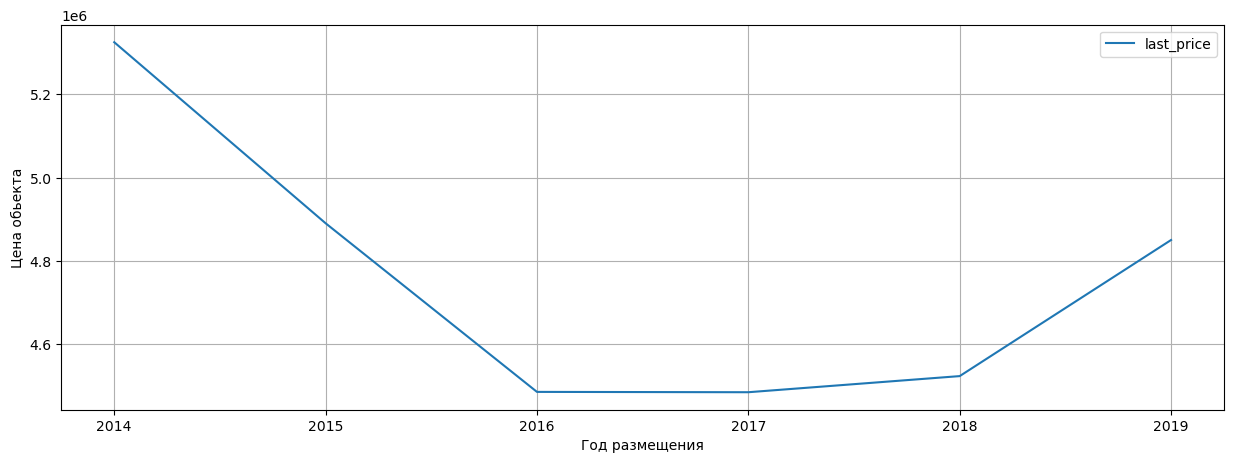

In [171]:
#Построили график год размещение к цене обьекта
data.pivot_table(index='first_year_expositio', values='last_price').plot(grid=True, kind= 'line', figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Год размещения')

<span style="color:blue">
    
Данный график показывается что зависимость между месяцем размещения обьекта и ценой обьект есть.
    
С марта по апрель мы видим рост цен на квартиры, с последующей корректировкой и падением цены.
    
В конце весны с мая по июнь, цены на квартиры самые низкие.
    
С июля по август идет рост цен на кваритры.
    
Цены обьектов не имеют большой волатильности около 9-10 месяц в году.
    
<span>

Text(0.5, 0, 'Месяц размещения')

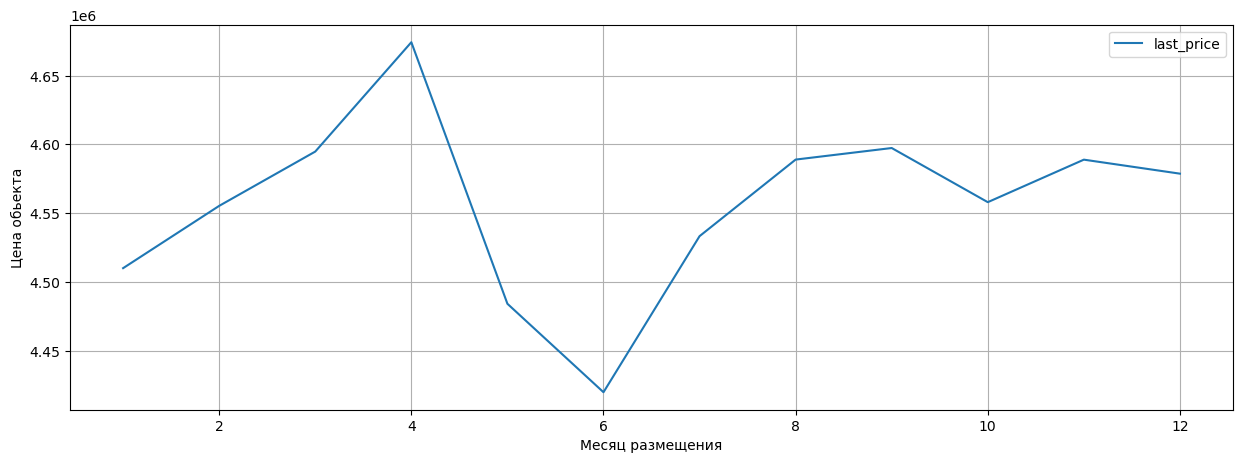

In [172]:
#Построили график месяц размещения и цена обьекта
data.pivot_table(index='first_month_expositio', values='last_price').plot(grid=True, kind= 'line', figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Месяц размещения')

<span style="color:blue">
    
Данный график показывает, что зависимость между днем размещения обьявления и ценой есть.

Самый большой пик в четверг первой недели месяца и последней недели месяца. В эти дни размещают квартиры которые имеют самую высокую цену. 
Получается размещение идет около двух недель с конца последней недели месяца до конца первой недели месяца.
    
Оставшиеся 2 недели месяца имеют волотильность цены, но не такую большую, как описанные недели выше.   
   
.<span>

Text(0.5, 0, 'День размещения')

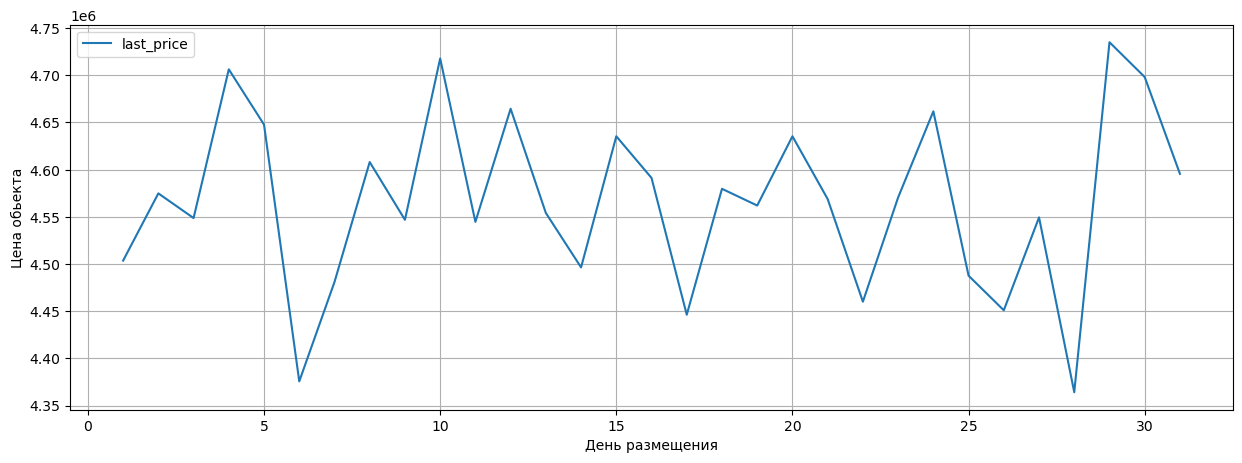

In [173]:
#Построили график день размещения цена обьекта
data.pivot_table(index='first_day_week_expositio', values='last_price').plot(grid=True, kind= 'line', figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('День размещения')

<span style="color:blue">
    
Данный график показывает зависимости между количеством комнат и ценой квартиры.
    
-Стоимость 1комнатного обьекта сильно меньше чем 2,3,4,5,6 комнатной.
    
-Стоимость 4х комнатного обьекта немного выше чем 3х.
    
-Стоимость 5ти комнатного обьекта самая большая из всех представленных на графике.

-Стоимсоть 6ти комнатного обьекта уменьшается в сравнении с 5ти комнатным обьектом
    
<span>

Text(0.5, 0, 'Комнаты')

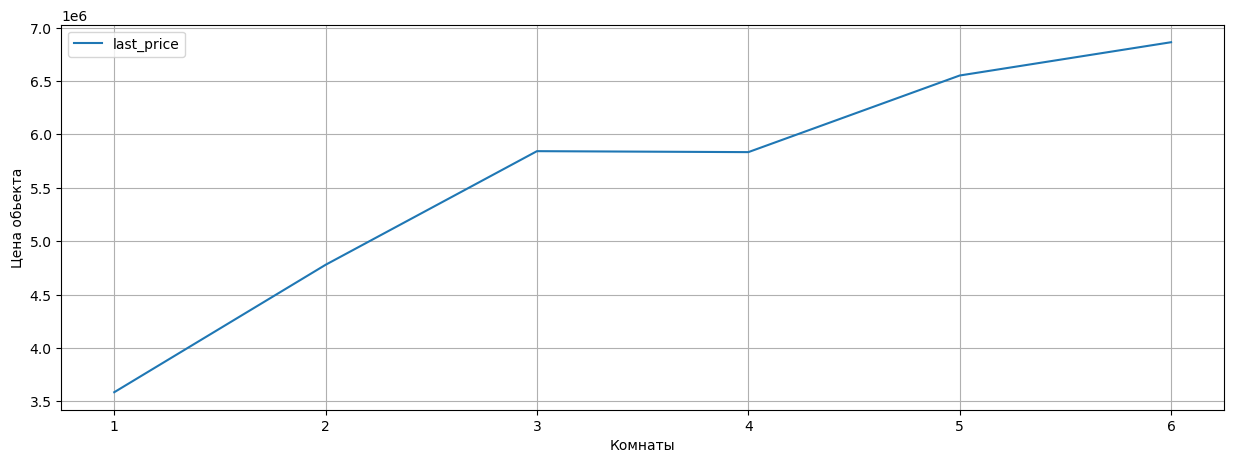

In [174]:
#Построили график количество комнат и цена обьекта
data.pivot_table(index='rooms', values='last_price').plot(grid=True, kind= 'line', figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Комнаты')

Вывел три графика с разными размерами кухонь меньше 6m2, больше 6m2 но меньше 10m2 и больше 10m2, сложно строить график с таким количесвом данных

<span style="color:blue">
Есть зависимость, но она больше похожу. на человеческий фактор. не могу рациональное обьяснение дать.
<span>

In [175]:
#Строим  сводную таблицу по комнатам  и кухня и стоимости обьектов
last_price_kitchen_m2 = data.groupby(['rooms']).agg({'kitchen_area_m2': ['mean', 'median'],
                                                         'last_price': ['mean', 'median']})
last_price_kitchen_m2.sort_values(by='rooms').head(20)

kitchen_area_m2           last_price           
                 mean median          mean     median
rooms                                                
1            9.140035   9.00  3.586625e+06  3500000.0
2            8.846583   8.70  4.779950e+06  4500000.0
3            9.130467   8.80  5.843918e+06  5499000.0
4            8.429435   7.85  5.834835e+06  5775000.0
5           10.457143   9.00  6.552381e+06  5300000.0
6           13.000000  13.00  6.864000e+06  6864000.0

In [176]:
#Узнали сколько кухни больше 10m2
len(data.query('kitchen_area_m2 > 10 '))

5199

<span style="color:blue">
    
Сделал 3 графика с разными размерами кухни, данных много и сложно проанализировать в одном графике.
Есть общее среднее в каждой таблице и также присутствуют выбросы. когда кухня сильно влияет на цену квариры.
    
Возможно это связанно с тем, что у нас в таблице, много населенных пунктов/городов. Поэтому в ценах влияния кухонь, есть такие выбросы.   
<span>

In [177]:
#Cтроим таблицу с кухнями больше 13m2
large_kitchen_area_10m2 = data.query('kitchen_area_m2 > 10 ')
large_kitchen_area_10m2

,town_name,last_price,price_m2,total_area_m2,rooms,living_area_m2,kitchen_area_m2,balcony,ceiling_height,floor,...,airports_nearest_km,number_parksponds_around3000,parks_nearest_m,ponds_nearest_m,first_day_exposition,first_day_week_expositio,first_month_expositio,first_year_expositio,days_exposition,total_images
1,поселок Шушары,3350000.0,82920.792079,40.4,1,18.60,11.0,2,2.65,1,...,12817.0,NaN,NaN,NaN,2018-12-04,4,12,2018,81.0,7
6,поселок Парголово,3700000.0,99195.710456,37.3,1,10.60,14.4,1,2.65,6,...,52996.0,NaN,NaN,NaN,2017-11-02,2,11,2017,155.0,6
17,Санкт-Петербург,4180000.0,116111.111111,36.0,1,16.50,11.0,1,2.65,7,...,33564.0,NaN,NaN,859.0,2016-09-09,9,9,2016,571.0,6
20,поселок Парголово,6120000.0,76500.000000,80.0,3,48.00,12.0,2,2.70,11,...,53134.0,NaN,NaN,NaN,2017-09-28,28,9,2017,74.0,12
22,деревня Кудрово,5000000.0,86206.896552,58.0,2,30.00,11.0,2,2.75,15,...,NaN,NaN,NaN,NaN,2017-04-24,24,4,2017,60.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23663,Санкт-Петербург,6400000.0,72727.272727,88.0,4,63.65,11.0,0,2.55,1,...,33642.0,NaN,NaN,844.0,2018-01-12,12,1,2018,59.0,12
23665,Санкт-Петербург,4250000.0,90425.531915,47.0,1,18.20,14.6,0,2.65,1,...,20503.0,NaN,624.0,519.0,2016-05-20,20,5,2016,131.0,11
23666,деревня Кудрово,8150000.0,101875.000000,80.0,3,44.90,11.4,0,2.65,12,...,NaN,NaN,NaN,NaN,2016-04-17,17,4,2016,286.0,9
23687,Санкт-Петербург,3200000.0,82051.282051,39.0,1,20.00,11.0,2,2.65,6,...,40837.0,NaN,NaN,NaN,2017-12-16,16,12,2017,38.0,6


<span style="color:blue">
    
На графике видно рост цены обьект когда кухня больше 10m2.
    
Я думаю, что это происходит из за того, что цена квадрата сильно меняется от населенного пункта.
Если кухня большая и этот обьект находится в Санк-Петербурге то и влияние будет больше, из за высокой цены на квадрат.
<span>

Text(0.5, 0, 'Размер кухни больше 10m2')

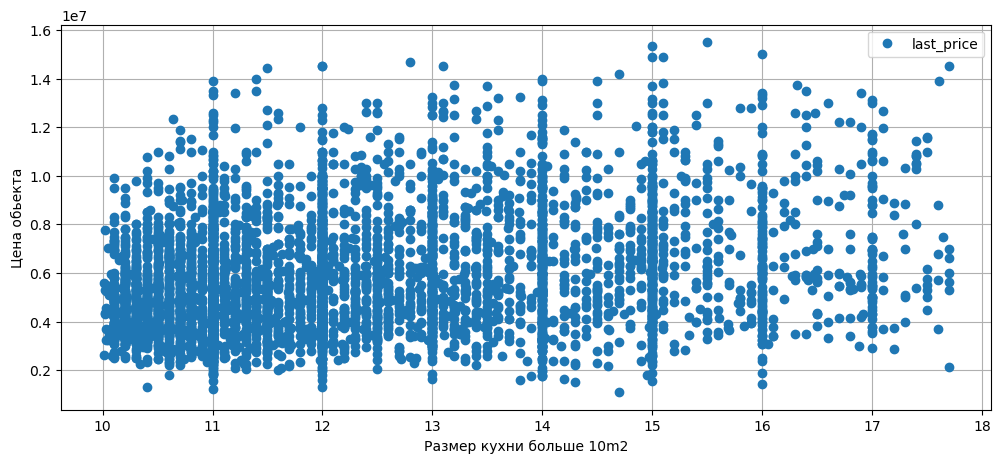

In [178]:
#Строим график с кухнями больше 10м2
large_kitchen_area_10m2[['kitchen_area_m2', 'last_price']].mean()
large_kitchen_area_10m2.plot(x='kitchen_area_m2', y='last_price', style='o',grid=True,figsize=(12,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Размер кухни больше 10m2')

In [179]:
#Строим таблицу с кухнями меньше 6m2
small_kitchen_area_6m2 = data.query('kitchen_area_m2 < 6 ')
small_kitchen_area_6m2

,town_name,last_price,price_m2,total_area_m2,rooms,living_area_m2,kitchen_area_m2,balcony,ceiling_height,floor,...,airports_nearest_km,number_parksponds_around3000,parks_nearest_m,ponds_nearest_m,first_day_exposition,first_day_week_expositio,first_month_expositio,first_year_expositio,days_exposition,total_images
13,Петергоф,3550000.0,82943.925234,42.8,2,27.0,5.2,1,2.56,5,...,37868.0,NaN,294.0,298.0,2017-07-01,1,7,2017,366.0,20
18,Санкт-Петербург,3250000.0,104838.709677,31.0,1,19.4,5.6,1,2.50,2,...,44060.0,NaN,759.0,NaN,2017-01-27,27,1,2017,168.0,8
21,Санкт-Петербург,3200000.0,101265.822785,31.6,1,16.9,5.7,1,2.65,2,...,36064.0,NaN,248.0,NaN,2018-03-14,14,3,2018,310.0,13
47,Гатчина,3600000.0,64171.122995,56.1,3,42.5,5.7,1,2.65,3,...,NaN,NaN,NaN,NaN,2018-10-18,18,10,2018,179.0,17
64,Гатчина,3100000.0,69977.426637,44.3,2,29.0,5.3,0,2.50,5,...,NaN,NaN,NaN,NaN,2017-11-07,7,11,2017,143.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,Красное Село,2950000.0,55037.313433,53.6,2,32.0,5.8,1,2.75,3,...,38293.0,NaN,NaN,NaN,2018-02-01,1,2,2018,35.0,1
23673,Санкт-Петербург,3100000.0,134782.608696,23.0,1,12.6,5.0,2,2.80,1,...,11813.0,NaN,262.0,442.0,2018-03-19,19,3,2018,41.0,9
23678,Пушкин,3500000.0,81395.348837,43.0,2,26.1,4.9,1,2.50,2,...,15823.0,NaN,NaN,1134.0,2016-05-19,19,5,2016,252.0,10
23683,поселок Дзержинского,2100000.0,33439.490446,62.8,4,45.5,5.5,0,2.50,3,...,NaN,NaN,NaN,NaN,2018-09-18,18,9,2018,155.0,16


<span style="color:blue">
На графике видно как кухни влияют на цену квартиры когда их размер составляет не больше 6m2

Если кухня меньше 5m2 то влияние на жилье минимально. Меньше квадратура кухни, меньше общая сумма. 

Если кухня находится в диапозоне 5м2 -6м2 она начинает влият на цену обьекта. Больше площадь кухни,
больше итоговая  сумма за квартиру
<span>

Text(0.5, 0, 'Размер кухни меньше 6m2')

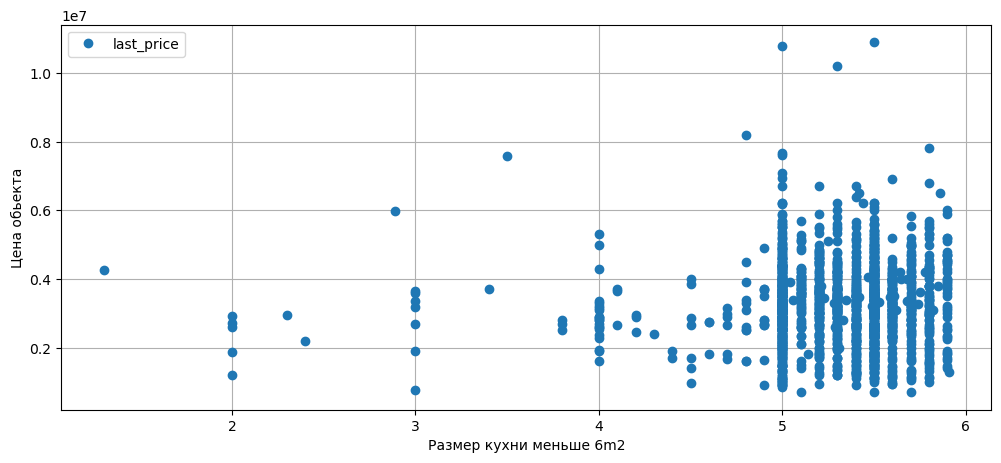

In [180]:
#Построили график кухни меньше 6m2 и цены обьекта
small_kitchen_area_6m2.plot(x='kitchen_area_m2', y='last_price', style='o',grid=True,figsize=(12,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Размер кухни меньше 6m2')

In [181]:
#Количество квартир с кухнями меньше 6m2
len(small_kitchen_area_6m2)

1607

In [182]:
#Строим таблицу с кухнями больше 6m2 и меньше 10m2
mean_kitchen_area_9m2 = data.query('kitchen_area_m2 > 6 and kitchen_area_m2 < 10')
mean_kitchen_area_9m2

,town_name,last_price,price_m2,total_area_m2,rooms,living_area_m2,kitchen_area_m2,balcony,ceiling_height,floor,...,airports_nearest_km,number_parksponds_around3000,parks_nearest_m,ponds_nearest_m,first_day_exposition,first_day_week_expositio,first_month_expositio,first_year_expositio,days_exposition,total_images
2,Санкт-Петербург,5196000.0,92785.714286,56.00,2,34.30,8.30,0,2.65,4,...,21741.0,NaN,90.0,574.0,2015-08-20,20,8,2015,558.0,10
5,городской поселок Янино-1,2890000.0,95065.789474,30.40,1,14.40,9.10,0,2.65,5,...,NaN,NaN,NaN,NaN,2018-09-10,10,9,2018,55.0,10
8,поселок Мурино,2900000.0,87454.764777,33.16,1,15.43,8.81,0,2.65,26,...,NaN,NaN,NaN,NaN,2018-05-23,23,5,2018,189.0,20
9,Санкт-Петербург,5400000.0,88524.590164,61.00,3,43.60,6.50,2,2.50,7,...,50898.0,NaN,NaN,NaN,2017-02-26,26,2,2017,289.0,18
10,Санкт-Петербург,5050000.0,127525.252525,39.60,1,20.30,8.50,0,2.67,3,...,38357.0,NaN,310.0,553.0,2017-11-16,16,11,2017,137.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,Санкт-Петербург,3300000.0,106451.612903,31.00,1,18.00,6.50,0,2.55,6,...,11751.0,NaN,140.0,317.0,2017-04-29,29,4,2017,193.0,8
23693,Петергоф,4600000.0,73717.948718,62.40,3,40.00,8.00,0,2.60,8,...,45602.0,NaN,352.0,675.0,2016-08-05,5,8,2016,239.0,9
23695,Тосно,3100000.0,52542.372881,59.00,3,38.00,8.50,0,2.65,4,...,NaN,NaN,NaN,NaN,2018-01-15,15,1,2018,45.0,14
23696,село Рождествено,2500000.0,44091.710758,56.70,2,29.70,8.70,0,2.65,1,...,NaN,NaN,NaN,NaN,2018-02-11,11,2,2018,91.0,18


<span style="color:blue">
На графике видно зависимость кухни которая больше 6м2 и меньше 10м2

Я бы назвал эти кухни средними.

С увеличением кухни мы видим, что и влияние ее на цену растет,
больше кухня,больше итоговая площадь квартиры, значит платим больше

Рост у нас не идеальный. но видно его линейность. пики роста от 0.8 до 1.6.
<span>

Text(0.5, 0, 'Размер кухни больше 6m2 но меньше 10m2')

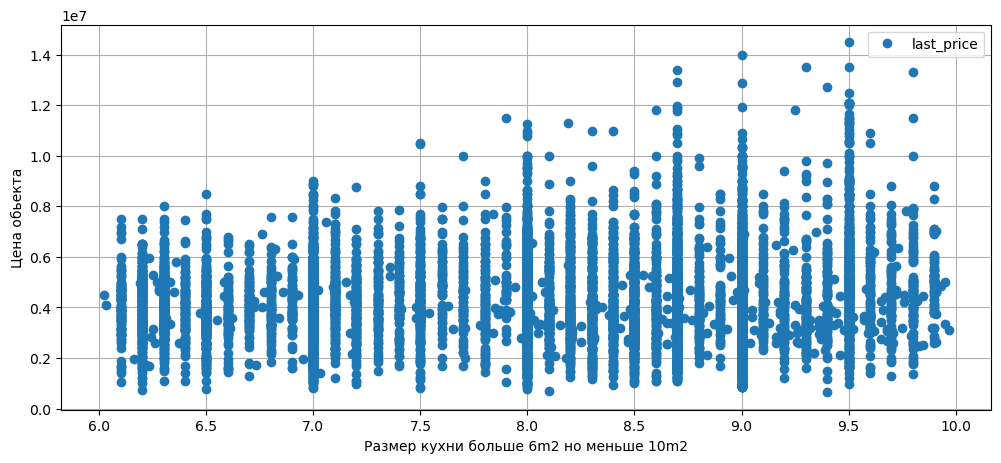

In [183]:
#построили график кухни больше 6m2 но меньше 10m2 к цене обекта
mean_kitchen_area_9m2.plot(x='kitchen_area_m2', y='last_price', style='o',grid=True,figsize=(12,5) )
plt.ylabel('Цена обьекта')
plt.xlabel('Размер кухни больше 6m2 но меньше 10m2')

In [184]:
#Количество кухонь в диапозоне от 6m2 до 10m2
len(mean_kitchen_area_9m2)

9409

<span style="color:blue">

На графике видно зависимость чем больше общая площадь квартиры, тем выше цена.

Также видно что на графике много обьектов от 25м2 до 65м2.
    
Цена увеличивается линейно. И ее влияние растет с увеличением м2.
<span>

Text(0.5, 0, 'Общая площадь квартиры')

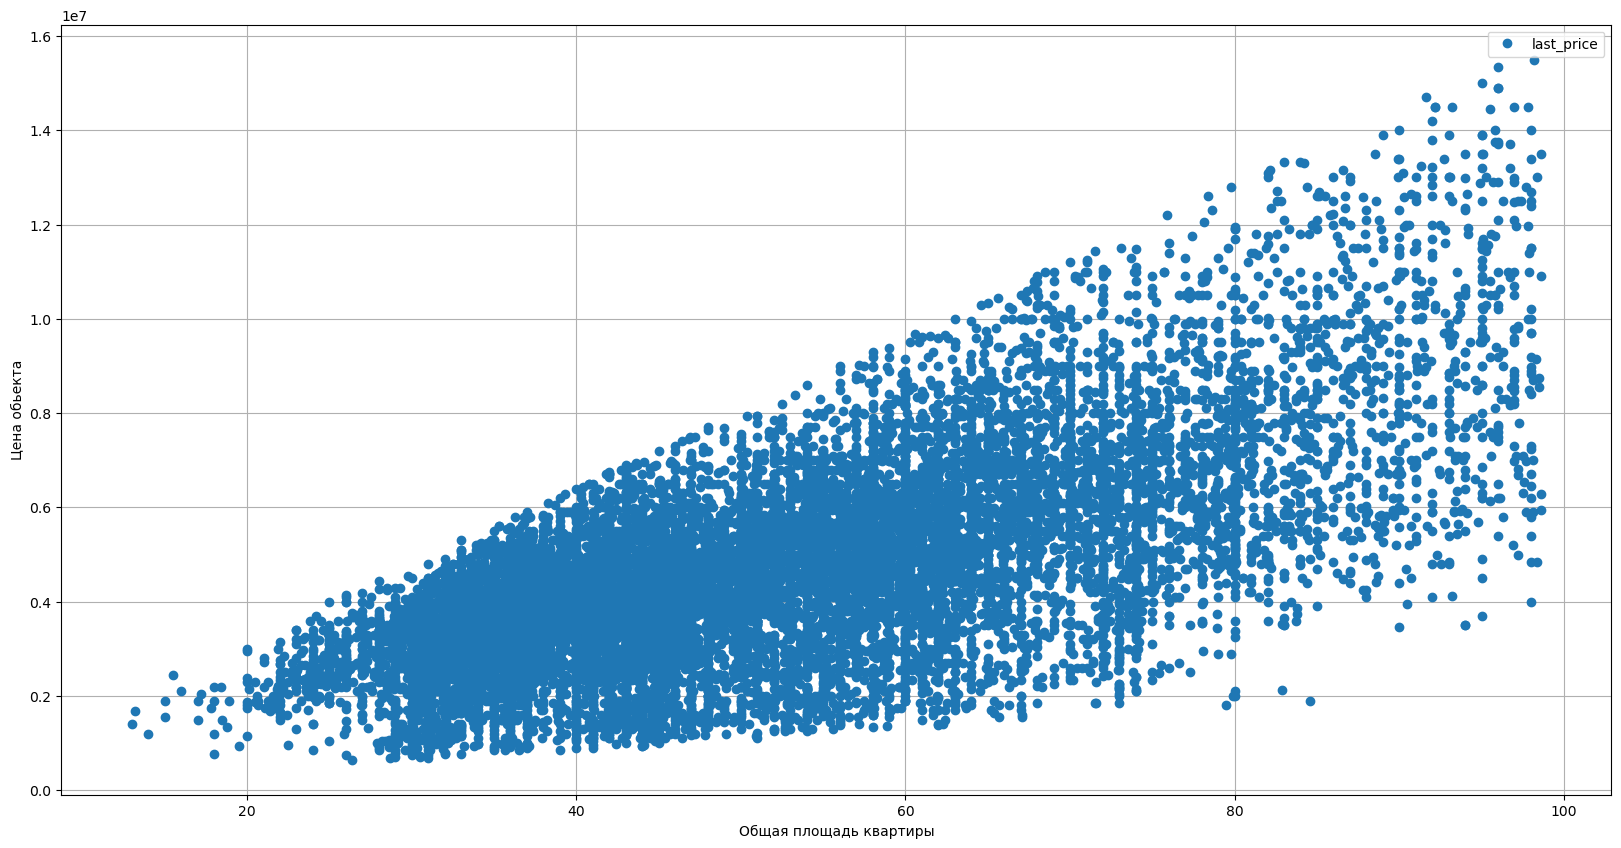

In [185]:
#Построили график цена обьекта и общая жилая площадь
data.plot(x='total_area_m2', y='last_price', style='o',grid=True,figsize=(20,10))
plt.ylabel('Цена обьекта')
plt.xlabel('Общая площадь квартиры')

<span style="color:blue">
На графике видно зависимость между ценой и жилой площадь m2.

На графике хорошо видно как каждые 10m2 жилой площади увеличивают влияние, это происходит до 60m2
<span>

Text(0.5, 0, 'Жилая площадь м2')

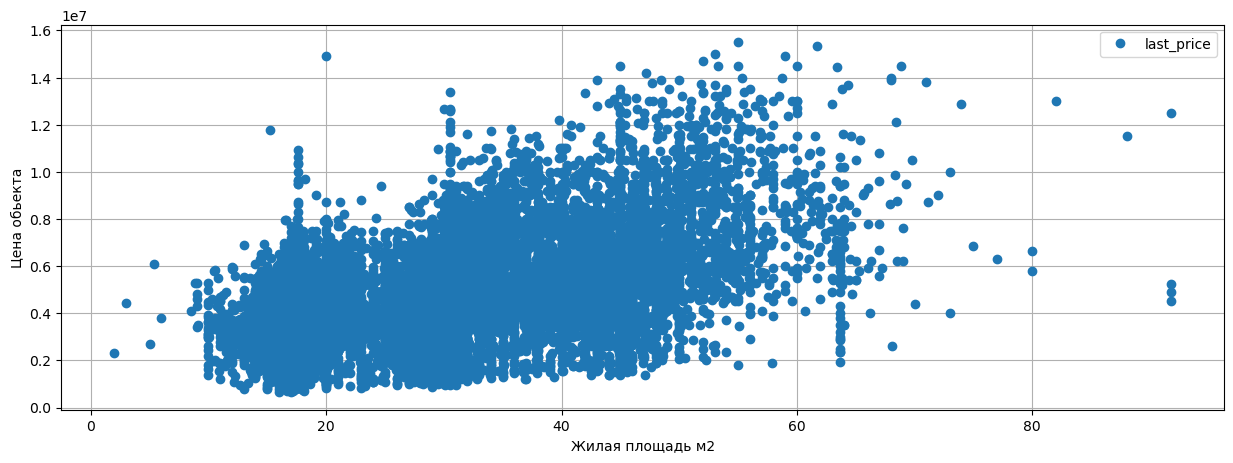

In [186]:
#Построили график жилая площадь и цена обьекта
data.plot(x='living_area_m2', y='last_price', style='o',grid=True,figsize=(15,5))
plt.ylabel('Цена обьекта')
plt.xlabel('Жилая площадь м2')

<span style="color:blue">

На графике видно зависимсоть цены от вида этажа обьекта.

Самые дешевые обьекты на первом этаже, немного дороже обьектыт на последнем этаже.

Самые дорогие этажи это другие.
<span>

Text(0.5, 0, 'Варианты этажей')

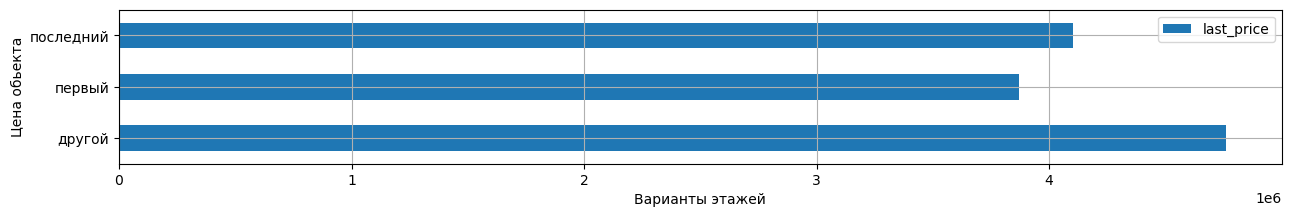

In [187]:
#Построили график цена обьекта и варианты этажей
data.pivot_table(index='floor_first_last_any', values='last_price').plot(grid=True, kind='barh', figsize=(15,2))
plt.ylabel('Цена обьекта')
plt.xlabel('Варианты этажей')

# Вывод задача 2

<span style="color:blue">
Построили таблицу корреляции, выявили столбцы которые оказывают большое влияние полную стоимость обьектов.
Постоирили графики и проверили корреляцию получили интересные результаты. 

В таблице корреляции год когда опубликовали обьявление не показала зависимость, график показала нам другой результат.
2014 год квартиры стоили дороже чем в 2015-2019 года.

Месяц и день публикации также имеют влияние на итоговую цену. Если выбрать правильный месяц и день покупки. Обьект будет немного дешевле в итоговой стоимости.

Количество комнат показывают кореляцию как в таблицу, которая равна 0.91-0.81, также и на графике мы видим потверждение.
Чем больше комнат, жилой площади и общей жилой обьект стоит дороже.

Кореляция кухни влияет, чем больше кухня на обьект и чем дороже квадрат обьекта, значит и итоговая цена возрастет.
    
Корреляция общей жилой площади и общей площади. развивается от меньшего к большему, как и положенно.
    
Жилая площадь теряет в кореляции после 60m2


Первый этаж влияет на уменьшее стоимости обьекта.
Дороже обьекты будут на последнем этаже.
Самое больше влияние оказывают этажи с любыми другими этажами, кроме первог и последнего.
<span>

# Задача 3 

<span style="color:blue">
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
<span>

In [188]:
#Сделал сводную таблицу назание населенного пункта, ценой за метр и наибольшим количеством обьявлений
sell_metr_town = data.groupby('town_name').agg({'price_m2' : 'mean',
                                                  'days_exposition':'count'})


In [189]:
#Вывели сводную таблицу последние 10 значений
sell_metr_town.sort_values(by='days_exposition',ascending=False).tail(10)
                                                                     

,price_m2,days_exposition
town_name,,
поселок Гладкое,30769.230769,1
поселок Высокоключевой,34931.506849,1
поселок Белоостров,66666.666667,1
поселок Алексеевка,22222.222222,1
поселок Александровская,63559.322034,1
коттеджный поселок Лесное,45690.298507,1
деревня Щеглово,56798.623064,1
деревня Шпаньково,27352.941176,1
деревня Хапо-Ое,55882.352941,1


In [190]:
#Вывели и осортировали по убыванию сводную таблицу 
sell_metr_town.sort_values(by='days_exposition',ascending=False).head(10)

,price_m2,days_exposition
town_name,,
Санкт-Петербург,103625.600825,11428
поселок Мурино,85780.527330,531
поселок Шушары,78576.687507,424
Всеволожск,66893.701795,368
Колпино,75366.453810,311
поселок Парголово,90983.426781,311
Пушкин,99623.466823,291
Гатчина,68929.716463,279
деревня Кудрово,93011.047104,274


Text(0.5, 0, 'Стоимость м2, Количество обьявлений')

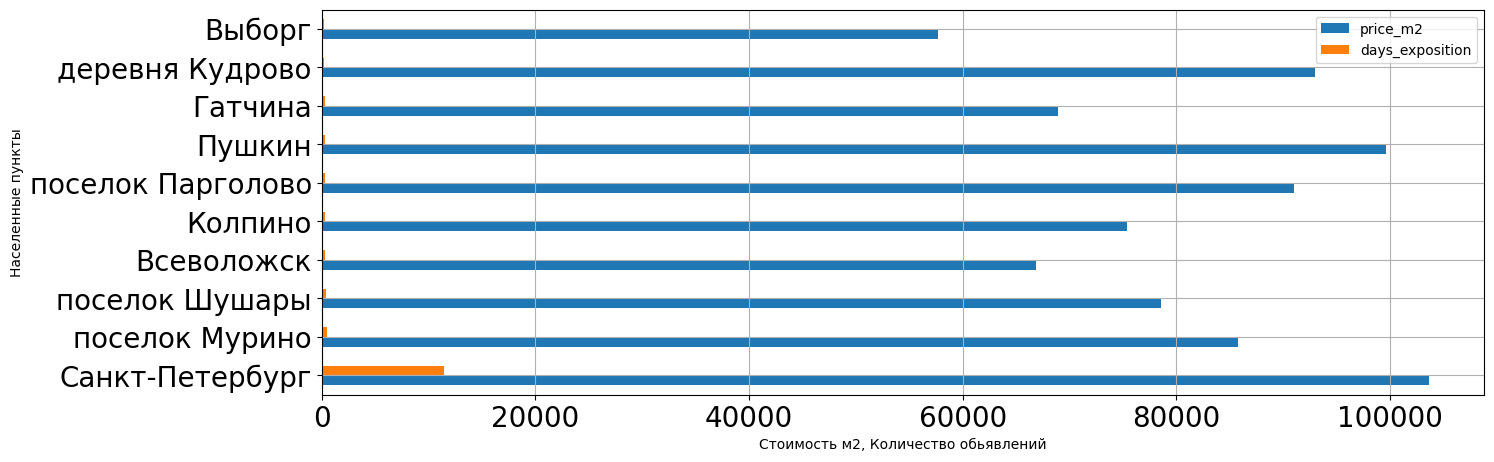

In [191]:
#График с населенными пунктами где больше всего обьявлений
sell_metr_town.sort_values(by='days_exposition',ascending=False).head(10) \
.plot(grid=True, kind='barh', figsize=(15,5), fontsize=20)
plt.ylabel('Населенные пункты')
plt.xlabel('Стоимость м2, Количество обьявлений')

# Вывод задача 3

<span style="color:blue"> 
    
Нашли 10 населенных пукнтов с наибольшим количесством обьявлений и посчитали среднюю стоимость квадрата.

Ожидаемый результат больше всего обьявленй в Санкт-Петербург и самый дорогой метр за квадрат 104252р рублей.

Самая низкая стоимость квадрата получилась в селе Шум 33898р
<span>

# Задача 4

<span style="color:blue"> 
Выделите квартиры в Санкт-Петербурге с помощью столбца town_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.
<span>

In [192]:
#Сделали список только по Санкт-Петербургу
#Посчитали среднюю стоимость километра
town_name_sort = data.query('town_name == "Санкт-Петербург"')
town_name_price_km = town_name_sort['last_price'].mean() / town_name_sort['citycenters_nearest_km'].mean()  
town_name_price_km

409833.43696139293

In [195]:
#Из рублей перевел в миллионы. но ругается на перезапись...
town_name_sort['last_price'] = town_name_sort['last_price']/1000000

C:\Users\hulyg\AppData\Local\Temp\ipykernel_6736\1942960317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_name_sort['last_price'] = town_name_sort['last_price']/1000000


In [196]:
#Сделали свобдную таблицу по цене расстоянию до центра и квадратуре по позврастанию километров от центра
cost_km = town_name_sort.pivot_table(index='last_price', values=['citycenters_nearest_km','living_area_m2'])
cost_km.sort_values(by=['citycenters_nearest_km','last_price']).head(20)

,citycenters_nearest_km,living_area_m2
last_price,,
0.000008,1.0,35.00
0.000011,1.0,58.00
0.000008,2.0,65.00
0.000009,2.0,64.40
0.000009,2.0,53.00
0.000014,2.0,71.00
0.000014,2.0,63.40
0.000002,3.0,17.60
0.000004,3.0,21.50


In [197]:
#Сделали свобдную таблицу по цене расстоянию до центра и квадратуре по убываю километров от центра
cost_km.sort_values(by='citycenters_nearest_km', ascending=False).head(20)

,citycenters_nearest_km,living_area_m2
last_price,,
0.000004,28.0,16.00
0.000004,28.0,16.00
0.000005,28.0,33.00
0.000003,28.0,18.00
0.000004,26.0,15.00
0.000003,26.0,14.00
0.000003,26.0,10.00
0.000003,26.0,10.00
0.000003,26.0,14.56


In [93]:
#Построили графики расстояние до центра и жилая площадь с ценой ближе к центру
cost_km.sort_values(by='citycenters_nearest_km').head(50) \
                    .plot(grid=True, kind='barh', figsize=(15,30), fontsize=20)
plt.ylabel('Стоимость обьктов')
plt.xlabel('Расстояние до центра, Общая площадь')

NameError: name 'cost_km' is not defined

In [94]:
#Построили графики расстояние до центра и жилая площадь с ценой дальше от центра
cost_km.sort_values(by='citycenters_nearest_km',ascending=False).head(50) \
.plot(grid=True, kind='barh', figsize=(15,30), fontsize=20)
plt.ylabel('Стоимость обьктов')
plt.xlabel('Расстояние до центра, Общая площадь')

NameError: name 'cost_km' is not defined

# Вывод задача 4

<span style="color:blue"> 
Увидели интересную закономерность обьекты с жилой площадью до 20м2 стоят примерно в одном диапозоне,
как в центре так и удаленно.

В центре обьекты с большой жилой площодью стоят дороже, чем удаленно от центра.

Не хватает года постойки обьектов, возможно есть сильная зависимость года на цену обьекта.
<span>

### Общий вывод

<span style="color:blue"> 
-1
    
    

Открыл данные и изучил информацию, подключил библиотеки для работы с дата сетом.

Было обнаружено много пропусков и не правильный тип данных.
    
    

-2
    
    

Заполнили пропуски так, чтобы не было сильного влияние на итоговые анализ.
После заполнения данные проверялись сводными таблицами, для понимая что полученные заполненые верно и их можно применить в решение поствленых задач.

Были изменены форматы колонок, которые не сответсвовали нашим запросам или изначально были не правильного формата.

Часть данных было оставлено без изменения, так как у нас нет возможности их заполнить, чтобы они не искажали итоговый результат.

Были обнаружены одинаковые столбцы пруды в радиусе 3км и парки в радиусе 3км, проведен анализ и принято решение удалить дублирущий столбец.

Поменяли названия столбцов и размещение столбцов в таблицу для удобства восприятия информации.

Было проведено небольшое исследование в днях когда обьявления было размещено, выводом даннного исследование стало, что мы е будем заполнять пропуски.Так как они не влияют на итоговый результат, а корректно мы их заполнить не можем. 

Был созданые новые столбцы для нашей работы, также были изменены еденицы измеренияв столбцах.
    
Из-за того что люди заполняют данные не охотно, не внимательно, не знают каких-то пунктов и пропускали их, мы заполняли данные так чтобы эти заполнение не вывзывали влияние.

Удалили аномалии через квартили

-3
    
    

После обработки данных были построеные гистограммы с описанием полученных в них данных.
Аномалий в них я не выявил.
    
    Список постоенных гистограм после обработки данных
    общая площадь

    -жилая площадь

    -площадь кухни

    -цена объекта

    -количество комнат

    -высота потолков

    -этаж квартиры

    -тип этажа квартиры («первый», «последний», «другой»)

    -общее количество этажей в доме

    -расстояние до центра города в метрах

    -расстояние до ближайшего аэропорта

    -расстояние до ближайшего парка

    -день и месяц публикации объявления.

    -Были решены поставленые задачи, составлены для решения графики и написаны итоговые выводы к каждой задаче
    
 Решенные задачи.
    
    Задача-1
    
    Изучаем как быстро продавались квартиры. Построим график, найдем среднее и медиану, сделаем сводную таблицу.
    
    Задача-2
    
    Задание: какие факторы больше всего влияют на общую (полную) стоимость объекта. Построим графики, которые покажут з         зависимость цены от указанных ниже параметров.

    общей площади;

    жилой площади;

    площади кухни;

    количество комнат;

    типа этажа, на котором расположена квартира (первый, последний, другой);

    даты размещения (день недели, месяц, год);
    
    Задача-3
    
     Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите          населённые пункты с самой высокой и низкой стоимостью квадратного метра.
    
    Задача-4
    
    Выделите квартиры в Санкт-Петербурге с помощью столбца town_name и вычислите среднюю цену каждого километра.               Опишите, как стоимость объектов зависит от расстояния до центра города. 
   
Хотелось бы добавить такие данные как год постойки жилья или вариант вторичный обьект, новый обьект.
<span>